# Project 1: SAT & ACT Analysis

## Problem Statement

Analysing the participation rates and scores of SAT and ACT, this report seeks to identity the reasons for the fluctuation of the SAT and ACT participation within US states. Using these reasons, the aim of this report is to recommend strategies to improve participation rates across __________ 

### Contents:

- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

#### Import libraries

In [102]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from string import digits

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## 2017 Data Import and Cleaning

#### 1. Read in SAT and ACT Data

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv("../data/act_2017_updated.csv")

#### 2 and 3. Display and describe data

Function to display data and information regarding data

In [3]:
def func_display_describe_data(data):
    no_rows = data.shape[0]
    no_cols = data.shape[1]
    col_list = data.columns
    
    print('Number of rows: {}'.format(no_rows))
    print('Number of columns: {}\n'.format(no_cols))
    print('Column headers: {}\n'.format(col_list))
    print("There are {} NaNs in the dataframe.\n".format(data.isnull().sum().sum()))
    print(data.describe())
    print(data.info())
    return data.head(10)    

In [4]:
# Displaying sat_2017 data
func_display_describe_data(sat_2017)

Number of rows: 51
Number of columns: 5

Column headers: Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

There are 0 NaNs in the dataframe.

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation             

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
# Displaying  act_2017 data
func_display_describe_data(act_2017)

Number of rows: 52
Number of columns: 7

Column headers: Index(['State', 'Participation', 'Composite', 'English', 'Mathematics',
       'Reading', 'Science'],
      dtype='object')

There are 0 NaNs in the dataframe.

       Participation  Composite    English  Mathematics    Reading    Science
count      52.000000  52.000000  52.000000    52.000000  52.000000  52.000000
mean       65.153846  21.509615  20.919231    21.173077  22.001923  21.442308
std        31.832518   2.002083   2.332132     1.963602   2.048672   1.723351
min         8.000000  17.800000  16.300000    18.000000  18.100000  18.200000
25%        31.000000  19.800000  19.000000    19.400000  20.475000  19.975000
50%        68.000000  21.400000  20.550000    20.900000  21.700000  21.300000
75%       100.000000  23.600000  23.300000    23.100000  24.125000  23.200000
max       100.000000  25.500000  25.500000    25.300000  26.000000  24.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data colum

,State,Participation,Composite,English,Mathematics,Reading,Science
0,Alabama,100,19.2,18.9,18.4,19.7,19.4
1,Alaska,65,19.8,18.7,19.8,20.4,19.9
2,Arizona,62,19.7,18.6,19.8,20.1,19.8
3,Arkansas,100,19.4,18.9,19.0,19.7,19.5
4,California,31,22.8,22.5,22.7,23.1,22.2
5,Colorado,100,20.8,20.1,20.3,21.2,20.9
6,Connecticut,31,25.2,25.5,24.6,25.6,24.6
7,Delaware,18,24.1,24.1,23.4,24.8,23.6
8,District of Columbia,32,24.2,24.4,23.5,24.9,23.5
9,Florida,73,19.8,19.0,19.4,21.0,19.4


- In terms of shape of dataframe, **sat_2017** contains **51 rows and 5 columns** while **act_2017** contains **52 rows and 7 columns**
- Both dataframes contain a **state** column, a column that indicates **participation %** for each state,**individual scores** for each test per state and the **final score** per state
    - sat_2017 columns: 'State', 'Participation', 'Evidence-Based Reading and Writing', 'Math', 'Total'
        - **Total** is the final score for the SAT exam: The Evidence-Based Reading and Writing (EBRW) and Math sections each use a scale of 200-800 and are ***combined*** for a total score.
     - act_2017 columns: 'State', 'Participation', 'Composite', 'English', 'Mathematics','Reading', 'Science'
        - **Composite** is the final score for the ACT exam: Each section uses a scale of 1-36. Your total score is the ***average*** of your four section scores.

#### 4a. Check if data is complete 

- The data does look complete as there are no missing/ null entries.
- However ACT data contains 52 rows while SAT row only contains 51 rows
    - ACT contains a "National" row which SAT does not contain

In [6]:
# Thus, we are removing the "National" row from act_2017 and saving it separately as act_national
act_national = act_2017.loc[act_2017["State"] == "National"]
act_2017.drop(act_2017.index[51],inplace=True)

In [7]:
act_national
#func_display_describe_data(act_2017) 

# Now if we view dataframe, we will only have 51 rows 

,State,Participation,Composite,English,Mathematics,Reading,Science
51,National,60,21.0,20.3,20.7,21.4,21.0


In [8]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null int64
Composite        51 non-null float64
English          51 non-null float64
Mathematics      51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


#### 4b. Check for any obvious issues with the observations

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
    - The Evidence-Based Reading and Writing (EBRW) and Math sections each use a scale of 200-800 and are combined for a total score. --> the minimum of math is beyond the lowest possible at 52.
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)
    - Each section uses a scale of 1-36. Your total score is the average of your four section scores.

- sat_sections = ["Math", "Evidence-Based Reading and Writing"]
- act_sections = ["Mathematics", "English", "Reading", "Science"]

In [9]:
# The minimum of math is beyond the lowest possible at 52
sat_2017[20:21]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [10]:
# Fixing the issue for sat_2017
sat_2017['Math'][20:21] = 524
sat_2017[20:21]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [11]:
#Ensuring consistency of data

# SAT sections should add up to SAT total - since there are many with 1 diff, we are only taking the state with >1 difference
check_sat = abs(sat_2017.Math + sat_2017["Evidence-Based Reading and Writing"] - sat_2017.Total)  
check_sat   #check_sat should be zero

print("For SAT scores:")
for ix,val in check_sat.items():  
    if val > 1:
        print("State {} ({}): Total SAT score differ from indiv scores by = {}".format(ix, sat_2017.loc[ix,'State'], val))
        
# ACT sections should add up to 4* the composite score - since there are many with 0.something difference, we are only taking those with >1 differenece
check_act = abs(act_2017.English + act_2017.Mathematics + act_2017.Reading + act_2017.Science - 4*act_2017.Composite)
check_act                
print("For ACT scores:")
for ix, val in check_act.items():
    if val > 1:
        print("State {} ({}): Total ACT score differ from indiv scores by = {}".format(ix, act_2017.loc[ix,'State'], val))

For SAT scores:
For ACT scores:


#### 5. Check datatype of each feature 

In [12]:
print("FOR SAT SCORE:\n", sat_2017.dtypes,'\n')
print("FOR ACT SCORE:\n", act_2017.dtypes)

FOR SAT SCORE:
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

FOR ACT SCORE:
 State             object
Participation      int64
Composite        float64
English          float64
Mathematics      float64
Reading          float64
Science          float64
dtype: object


Participation is a object, while for analysis we will need it to be a number

#### 6. Fix incorrect data type(s)

In [13]:
# Removing '%' from Participation values and turning them to float
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: x.replace('%',''))
sat_2017['Participation'] = sat_2017['Participation'].astype(float)

act_2017['Participation'] = act_2017['Participation'].astype(float)

In [14]:
# Checking datatypes again

print("FOR SAT SCORE:\n", sat_2017.dtypes,'\n')
print("FOR ACT SCORE:\n", act_2017.dtypes)

FOR SAT SCORE:
 State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object 

FOR ACT SCORE:
 State             object
Participation    float64
Composite        float64
English          float64
Mathematics      float64
Reading          float64
Science          float64
dtype: object


#### 7. Rename Columns

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
print("sat columns: ", sat_2017.columns, "\n",
"act columns: ",act_2017.columns)

sat columns:  Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object') 
 act columns:  Index(['State', 'Participation', 'Composite', 'English', 'Mathematics',
       'Reading', 'Science'],
      dtype='object')


In [16]:
# Renaming for sat 2017
sat_2017.rename(columns= {'State': 'state',
                         'Participation': 'participation_sat17',
                         'Evidence-Based Reading and Writing': 'ebrw_sat17',
                         'Math': 'math_sat17',
                         'Total': 'total_sat17'}, inplace = True)
sat_2017.head()

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [17]:
# Renaming for act 2017
act_2017.rename(columns = {'State': 'state',
                          'Participation': 'participation_act17',
                          'Composite': 'composite_act17',
                          'English': 'english_act17',
                          'Mathematics': 'math_act17',
                          'Reading': 'reading_act17',
                          'Science':'science_act17'}, inplace = True)
act_2017.head()

,state,participation_act17,composite_act17,english_act17,math_act17,reading_act17,science_act17
0,Alabama,100.0,19.2,18.9,18.4,19.7,19.4
1,Alaska,65.0,19.8,18.7,19.8,20.4,19.9
2,Arizona,62.0,19.7,18.6,19.8,20.1,19.8
3,Arkansas,100.0,19.4,18.9,19.0,19.7,19.5
4,California,31.0,22.8,22.5,22.7,23.1,22.2


#### 8. Creating a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|This column contains all the states|
|participation_sat17|float|SAT|The participation % for SAT per state|
|ebrw_sat17|int|SAT|The score for Evidence-Based Reading and Writing for SAT per state|
|math_sat17|int|SAT|The score for Math for SAT per state|
|total_sat17|int|SAT|The total SAT score per state|
|participation_act17|float|ACT|The participation % for SAT per state|
|composite_act17|float|ACT|The average score for ACT per state|
|english_act17|float|ACT|The score for English for ACT per state|
|math_act17|float|ACT|The score for Math for ACT per state|
|reading_act17|float|ACT|The score for Reading for ACT per state|
|science_act17|float|ACT|The score for Science for ACT per state|

#### 9. Drop unnecessary rows

- Done previously

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
act_sat_2017 = pd.merge(sat_2017, act_2017, on='state')
act_sat_2017.head()

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,composite_act17,english_act17,math_act17,reading_act17,science_act17
0,Alabama,5.0,593,572,1165,100.0,19.2,18.9,18.4,19.7,19.4
1,Alaska,38.0,547,533,1080,65.0,19.8,18.7,19.8,20.4,19.9
2,Arizona,30.0,563,553,1116,62.0,19.7,18.6,19.8,20.1,19.8
3,Arkansas,3.0,614,594,1208,100.0,19.4,18.9,19.0,19.7,19.5
4,California,53.0,531,524,1055,31.0,22.8,22.5,22.7,23.1,22.2


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
act_sat_2017.to_csv('../data/combined_2017.csv', index = True) 

## 2018 Data Import and Cleaning

#### 1. Run the above steps for 2018 data

In [20]:
# Reading in csv data
act_2018 = pd.read_csv("../data/act_2018_updated.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [ ]:
# func_display_describe_data(sat_2018)

In [ ]:
#func_display_describe_data(act_2018)

In [21]:
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: x.replace('%',''))
sat_2018['Participation'] = sat_2018['Participation'].astype(float)

In [22]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [23]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [24]:
# Checking for datatypes

print("FOR SAT SCORE:\n", sat_2018.dtypes,'\n')
print("FOR ACT SCORE:\n", act_2018.dtypes)

FOR SAT SCORE:
 State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object 

FOR ACT SCORE:
 State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object


In [25]:
sat_2018.rename(columns= {'State': 'state',
                         'Participation': 'participation_sat18',
                         'Evidence-Based Reading and Writing': 'ebrw_sat18',
                         'Math': 'math_sat18',
                         'Total': 'total_sat18'}, inplace = True)
sat_2018.head()

,state,participation_sat18,ebrw_sat18,math_sat18,total_sat18
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [26]:
act_2018.rename(columns = {'State': 'state',
                          'Percentage of Students Tested': 'participation_act18',
                          'Average Composite Score': 'composite_act18',
                          'Average English Score': 'english_act18',
                          'Average Math Score': 'math_act18',
                          'Average Reading Score': 'reading_act18',
                          'Average Science Score':'science_act18'}, inplace = True)
act_2018.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [27]:
act_sat_2018 = pd.merge(sat_2018, act_2018, on='state')
act_sat_2018.head()

,state,participation_sat18,ebrw_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


#### 2. Merge 2017 and 2018 data together

In [28]:
act_sat_1718 = pd.merge(act_sat_2017, act_sat_2018, on='state')
act_sat_1718.head()

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,composite_act17,english_act17,math_act17,reading_act17,...,participation_sat18,ebrw_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,5.0,593,572,1165,100.0,19.2,18.9,18.4,19.7,...,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,19.8,18.7,19.8,20.4,...,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,19.7,18.6,19.8,20.1,...,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,19.4,18.9,19.0,19.7,...,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.8,22.5,22.7,23.1,...,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


#### 3. Save your cleaned merged final dataframe

In [29]:
act_sat_1718.to_csv('../data/final_2017.csv', index = True)

## Exploratory Data Analysis

### Summary Statistics

In [30]:
act_sat_1718.describe()

,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,composite_act17,english_act17,math_act17,reading_act17,science_act17,participation_sat18,ebrw_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,21.519608,20.931373,21.182353,22.013725,21.450980,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.020695,2.353677,1.981989,2.067271,1.739353,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,17.800000,16.300000,18.000000,18.100000,18.200000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.800000,19.000000,19.400000,20.450000,19.950000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,21.400000,20.700000,20.900000,21.800000,21.300000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.600000,23.300000,23.100000,24.150000,23.200000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.500000,25.300000,26.000000,24.900000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [31]:
def my_std(values):
    mu = np.mean(values)
    return np.sqrt(sum([(v-mu)**2 for v in values])/len(values))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [32]:
# The loop method

std_dict = {}
for ix in act_sat_1718.columns[1:]:
    #print(ix)
    std_dict[ix] = my_std(act_sat_1718[ix])
    
std_dict

{'participation_sat17': 34.92907076664508,
 'ebrw_sat17': 45.21697020437866,
 'math_sat17': 46.65713364485503,
 'total_sat17': 91.58351056778743,
 'participation_act17': 31.824175751231806,
 'composite_act17': 2.000786081581989,
 'english_act17': 2.3304876369363363,
 'math_act17': 1.9624620273436781,
 'reading_act17': 2.0469029314842646,
 'science_act17': 1.7222161451443676,
 'participation_sat18': 36.946619223539415,
 'ebrw_sat18': 47.03460978357609,
 'math_sat18': 47.30194550378352,
 'total_sat18': 93.22742384464433,
 'participation_act18': 33.745194881997506,
 'composite_act18': 2.0855261815801147,
 'english_act18': 2.4222536143202795,
 'math_act18': 2.015707255555717,
 'reading_act18': 2.145891884510421,
 'science_act18': 1.8516885484833543}

In [33]:
# The dictionary comprehension method

{col.name:my_std(col) for col in [act_sat_1718[i] for i in act_sat_1718.columns if (act_sat_1718[i].dtype=='float64') or (act_sat_1718[i].dtype=='int64')]}

{'participation_sat17': 34.92907076664508,
 'ebrw_sat17': 45.21697020437866,
 'math_sat17': 46.65713364485503,
 'total_sat17': 91.58351056778743,
 'participation_act17': 31.824175751231806,
 'composite_act17': 2.000786081581989,
 'english_act17': 2.3304876369363363,
 'math_act17': 1.9624620273436781,
 'reading_act17': 2.0469029314842646,
 'science_act17': 1.7222161451443676,
 'participation_sat18': 36.946619223539415,
 'ebrw_sat18': 47.03460978357609,
 'math_sat18': 47.30194550378352,
 'total_sat18': 93.22742384464433,
 'participation_act18': 33.745194881997506,
 'composite_act18': 2.0855261815801147,
 'english_act18': 2.4222536143202795,
 'math_act18': 2.015707255555717,
 'reading_act18': 2.145891884510421,
 'science_act18': 1.8516885484833543}

In [34]:
# Rearranging columns and saving them to another variable - actsat_1718
actsat_1718 = act_sat_1718[['state','participation_sat17','ebrw_sat17', 'math_sat17',
       'total_sat17', 'participation_act17', 'english_act17', 'math_act17', 'reading_act17', 'science_act17', 'composite_act17','participation_sat18', 'ebrw_sat18', 'math_sat18', 'total_sat18',
       'participation_act18','english_act18', 'math_act18',
       'reading_act18', 'science_act18', 'composite_act18']]
actsat_1718

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,...,participation_sat18,ebrw_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27,22.5,22.5,23.0,22.1,22.7
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30,23.9,23.2,24.4,23.5,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26,26.0,24.8,26.1,24.9,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32,23.7,22.7,24.4,23.0,23.6
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,56.0,550,549,1099,66,19.2,19.3,21.1,19.5,19.9


In [35]:
actsat_1718.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                  51 non-null object
participation_sat17    51 non-null float64
ebrw_sat17             51 non-null int64
math_sat17             51 non-null int64
total_sat17            51 non-null int64
participation_act17    51 non-null float64
english_act17          51 non-null float64
math_act17             51 non-null float64
reading_act17          51 non-null float64
science_act17          51 non-null float64
composite_act17        51 non-null float64
participation_sat18    51 non-null float64
ebrw_sat18             51 non-null int64
math_sat18             51 non-null int64
total_sat18            51 non-null int64
participation_act18    51 non-null int64
english_act18          51 non-null float64
math_act18             51 non-null float64
reading_act18          51 non-null float64
science_act18          51 non-null float64
composite_act18        51 non-null float64
dtypes: f

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

In [36]:
actsat_1718.head()

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,...,participation_sat18,ebrw_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


- Which states have the highest and lowest participation rates for the:

**2017 SAT**

In [37]:
#showing only the state and participation_sat17 columns
p_sat17 = actsat_1718.loc[:,['state','participation_sat17']]
p_sat17.head()

,state,participation_sat17
0,Alabama,5.0
1,Alaska,38.0
2,Arizona,30.0
3,Arkansas,3.0
4,California,53.0


In [38]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(p_sat17['participation_sat17'])
print("top 3 participation rates are (%): ", x[-3:])
print("bottom 3 participation rates are (%): ", x[:3])

p_sat17_low = p_sat17[p_sat17['participation_sat17'] <= x[2]].sort_values(by=['participation_sat17'], ascending = False)
p_sat17_high = p_sat17[p_sat17['participation_sat17'] >= x[-3]].sort_values(by=['participation_sat17'], ascending = False)

top 3 participation rates are (%):  [ 95.  96. 100.]
bottom 3 participation rates are (%):  [2. 3. 4.]


In [39]:
# States based on top 3 participation rate in sat 2017
p_sat17_high

,state,participation_sat17
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0
29,New Hampshire,96.0
19,Maine,95.0


In [40]:
# States based on bottom 3 participation rate in sat 2017
p_sat17_low

,state,participation_sat17
16,Kansas,4.0
17,Kentucky,4.0
18,Louisiana,4.0
3,Arkansas,3.0
23,Minnesota,3.0
25,Missouri,3.0
27,Nebraska,3.0
41,South Dakota,3.0
44,Utah,3.0
49,Wisconsin,3.0


**2018 SAT**

In [41]:
p_sat18 = actsat_1718.loc[:,['state','participation_sat18']]
p_sat18.head()

,state,participation_sat18
0,Alabama,6.0
1,Alaska,43.0
2,Arizona,29.0
3,Arkansas,5.0
4,California,60.0


In [42]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(p_sat18['participation_sat18'])
print("top 3 participation rates are (%): ", x[-3:])
print("bottom 3 participation rates are (%): ", x[:3])

p_sat18_low = p_sat18[p_sat18['participation_sat18'] <= x[2]].sort_values(by=['participation_sat18'], ascending = False)
p_sat18_high = p_sat18[p_sat18['participation_sat18'] >= x[-3]].sort_values(by=['participation_sat18'], ascending = False)

top 3 participation rates are (%):  [ 97.  99. 100.]
bottom 3 participation rates are (%):  [2. 3. 4.]


In [43]:
# States based on top 3 participation rate in sat 2018
p_sat18_high

,state,participation_sat18
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0
13,Illinois,99.0
19,Maine,99.0
39,Rhode Island,97.0


In [44]:
# States based on bottom 3 participation rate in sat 2018
p_sat18_low

,state,participation_sat18
16,Kansas,4.0
17,Kentucky,4.0
18,Louisiana,4.0
23,Minnesota,4.0
25,Missouri,4.0
44,Utah,4.0
15,Iowa,3.0
24,Mississippi,3.0
27,Nebraska,3.0
41,South Dakota,3.0


**2017 ACT**

In [45]:
p_act17 = actsat_1718.loc[:,['state','participation_act17']]
p_act17.head()

,state,participation_act17
0,Alabama,100.0
1,Alaska,65.0
2,Arizona,62.0
3,Arkansas,100.0
4,California,31.0


In [46]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(p_act17['participation_act17'])
print("top 3 participation rates are (%): ", x[-3:])
print("bottom 3 participation rates are (%): ", x[:3])

p_act17_low = p_act17[p_act17['participation_act17'] <= x[2]].sort_values(by=['participation_act17'], ascending = False)
p_act17_high = p_act17[p_act17['participation_act17'] >= x[-3]].sort_values(by=['participation_act17'], ascending = False)

top 3 participation rates are (%):  [ 93.  98. 100.]
bottom 3 participation rates are (%):  [ 8. 18. 21.]


In [47]:
# States based on top 3 participation rate in act 2017
p_act17_high

,state,participation_act17
0,Alabama,100.0
3,Arkansas,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


In [48]:
# States based on bottom 3 participation rate in act 2017
p_act17_low

,state,participation_act17
39,Rhode Island,21.0
7,Delaware,18.0
29,New Hampshire,18.0
19,Maine,8.0


**2018 ACT**

In [49]:
p_act18 = actsat_1718.loc[:,['state','participation_act18']]
p_act18.head()

,state,participation_act18
0,Alabama,100
1,Alaska,33
2,Arizona,66
3,Arkansas,100
4,California,27


In [50]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(p_act18['participation_act18'])
print("top 3 participation rates are (%): ", x[-3:])
print("bottom 3 participation rates are (%): ", x[:3])

p_act18_low = p_act18[p_act18['participation_act18'] <= x[2]].sort_values(by=['participation_act18'], ascending = False)
p_act18_high = p_act18[p_act18['participation_act18'] >= x[-3]].sort_values(by=['participation_act18'], ascending = False)

top 3 participation rates are (%):  [ 98  99 100]
bottom 3 participation rates are (%):  [ 7 15 16]


In [51]:
# States based on top 3 participation rate in act 2018
p_act18_high

,state,participation_act18
0,Alabama,100
3,Arkansas,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


In [52]:
# States based on bottom 3 participation rate in act 2018
p_act18_low

,state,participation_act18
29,New Hampshire,16
39,Rhode Island,15
19,Maine,7


- Which states have the highest and lowest mean total/composite scores for the:

In [ ]:
# from sklearn import preprocessing

In [ ]:
# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(df)
# df_normalized = pd.DataFrame(np_scaled, columns = cols)
# df_normalized

In [ ]:
# total_composite = actsat_1718[['total_sat17','total_sat18','composite_act17', 'composite_act18']]
# cols = total_composite.columns
# df = pd.DataFrame(total_composite)
# df.head()

In [ ]:
# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(total_composite)
# total_composite_normalised = pd.DataFrame(np_scaled, columns = cols)
# df_normalized

In [53]:
t_meanscores = actsat_1718.loc[:,['state','total_sat17', 'total_sat18', 'composite_act17', 'composite_act18']]
t_meanscores['mean_sat17'] = t_meanscores['total_sat17']/2
t_meanscores['mean_sat18'] = t_meanscores['total_sat18']/2
t_meanscores.head()

,state,total_sat17,total_sat18,composite_act17,composite_act18,mean_sat17,mean_sat18
0,Alabama,1165,1166,19.2,19.1,582.5,583.0
1,Alaska,1080,1106,19.8,20.8,540.0,553.0
2,Arizona,1116,1149,19.7,19.2,558.0,574.5
3,Arkansas,1208,1169,19.4,19.4,604.0,584.5
4,California,1055,1076,22.8,22.7,527.5,538.0


**2017 SAT**

In [120]:
t_sat17 = t_meanscores.loc[:,['state','mean_sat17']]
t_sat17

,state,mean_sat17
0,Alabama,582.5
1,Alaska,540.0
2,Arizona,558.0
3,Arkansas,604.0
4,California,527.5
5,Colorado,600.5
6,Connecticut,520.5
7,Delaware,498.0
8,District of Columbia,475.0
9,Florida,508.5


In [55]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(t_sat17['mean_sat17'])
print("States with top 3 mean scores are: ", x[-3:])
print("States with bottom 3 mean scores are: ", x[:3])

t_sat17_low = t_sat17[t_sat17['mean_sat17'] <= x[2]].sort_values(by=['mean_sat17'], ascending = False)
t_sat17_high = t_sat17[t_sat17['mean_sat17'] >= x[-3]].sort_values(by=['mean_sat17'], ascending = False)

States with top 3 mean scores are:  [637.5 645.5 647.5]
States with bottom 3 mean scores are:  [475.  498.  502.5]


In [56]:
t_sat17_low

,state,mean_sat17
12,Idaho,502.5
22,Michigan,502.5
7,Delaware,498.0
8,District of Columbia,475.0


In [57]:
t_sat17_high

,state,mean_sat17
23,Minnesota,647.5
49,Wisconsin,645.5
15,Iowa,637.5


**2018 SAT**

In [121]:
t_sat18 = t_meanscores.loc[:,['state','mean_sat18']]
t_sat18

,state,mean_sat18
0,Alabama,583.0
1,Alaska,553.0
2,Arizona,574.5
3,Arkansas,584.5
4,California,538.0
5,Colorado,512.5
6,Connecticut,526.5
7,Delaware,499.0
8,District of Columbia,488.5
9,Florida,549.5


In [59]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(t_sat18['mean_sat18'])
print("States with top 3 mean scores are: ", x[-3:])
print("States with bottom 3 mean scores are: ", x[:3])

t_sat18_low = t_sat18[t_sat18['mean_sat18'] <= x[2]].sort_values(by=['mean_sat18'], ascending = False)
t_sat18_high = t_sat18[t_sat18['mean_sat18'] >= x[-3]].sort_values(by=['mean_sat18'], ascending = False)

States with top 3 mean scores are:  [641.5 647.  649. ]
States with bottom 3 mean scores are:  [488.5 499.  499.5]


In [60]:
t_sat18_low

,state,mean_sat18
48,West Virginia,499.5
7,Delaware,499.0
8,District of Columbia,488.5


In [61]:
t_sat18_high

,state,mean_sat18
23,Minnesota,649.0
49,Wisconsin,647.0
34,North Dakota,641.5


**2017 ACT**

In [62]:
c_act17 = actsat_1718.loc[:,['state','composite_act17']]
c_act17.head()

,state,composite_act17
0,Alabama,19.2
1,Alaska,19.8
2,Arizona,19.7
3,Arkansas,19.4
4,California,22.8


In [63]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(c_act17['composite_act17'])
print("States with top 3 scores are: ", x[-3:])
print("States with bottom 3 scores are: ", x[:3])

c_act17_low = c_act17[c_act17['composite_act17'] <= x[2]].sort_values(by=['composite_act17'], ascending = False)
c_act17_high = c_act17[c_act17['composite_act17'] >= x[-3]].sort_values(by=['composite_act17'], ascending = False)

States with top 3 scores are:  [25.2 25.4 25.5]
States with bottom 3 scores are:  [17.8 18.6 18.7]


In [64]:
c_act17_low

,state,composite_act17
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


In [65]:
c_act17_high

,state,composite_act17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2


**2018 ACT**

In [66]:
c_act18 = actsat_1718.loc[:,['state','composite_act18']]
c_act18.head()

,state,composite_act18
0,Alabama,19.1
1,Alaska,20.8
2,Arizona,19.2
3,Arkansas,19.4
4,California,22.7


In [67]:
# Getting the unique values for scores to find the top 3 and bottom 3 
x = np.unique(c_act18['composite_act18'])
print("States with top 3 scores are: ", x[-3:])
print("States with bottom 3 scores are: ", x[:3])

c_act18_low = c_act18[c_act18['composite_act18'] <= x[2]].sort_values(by=['composite_act18'], ascending = False)
c_act18_high = c_act18[c_act18['composite_act18'] >= x[-3]].sort_values(by=['composite_act18'], ascending = False)

States with top 3 scores are:  [25.1 25.5 25.6]
States with bottom 3 scores are:  [17.7 18.3 18.6]


In [68]:
c_act18_low

,state,composite_act18
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


In [69]:
c_act18_high

,state,composite_act18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1


In [124]:
t_sat17.sort_values(by = 'mean_sat17', ascending= False)

,state,mean_sat17
23,Minnesota,647.5
49,Wisconsin,645.5
15,Iowa,637.5
25,Missouri,635.5
16,Kansas,630.0
34,North Dakota,628.0
27,Nebraska,626.5
17,Kentucky,623.5
24,Mississippi,621.0
44,Utah,619.0


In [125]:
t_sat18.sort_values(by = 'mean_sat18', ascending=False)

,state,mean_sat18
23,Minnesota,649.0
49,Wisconsin,647.0
34,North Dakota,641.5
15,Iowa,632.5
16,Kansas,632.5
25,Missouri,631.0
50,Wyoming,628.5
27,Nebraska,626.0
17,Kentucky,624.0
41,South Dakota,620.0


- Do any states with 100% participation on a given test have a rate change year-to-year?

In [70]:
# Query for any states that had full participation in one year but not the other (2017/2018)
full_change = actsat_1718[(                                      # Assigning output to new dataframe var
        ((actsat_1718['participation_act17']==100)|(actsat_1718['participation_act18']==100)) # Include St if full ACT participation
        &                                                                           # in either year, AND
        (actsat_1718['participation_act17']!=actsat_1718['participation_act18'])          # the other year is not also full
        |                                                                           # OR
        ((actsat_1718['participation_sat17']==100)|(actsat_1718['participation_sat18']==100)) # the state had full SAT for 17 or 18
        &                                                                           # AND
        (actsat_1718['participation_sat17']!=actsat_1718['participation_sat18'])          # the other year is not also full
    )]
full_change[['state', 'participation_sat17', 'participation_sat18', 'participation_act17', #Then show relevant cols
               'participation_act18']].style.highlight_max(axis=1,color='lavender') # Added Pandas formatting to indicate which tests were 100%

,state,participation_sat17,participation_sat18,participation_act17,participation_act18
5,Colorado,11,100,100,30
8,District of Columbia,100,92,32,32
12,Idaho,93,100,38,36
23,Minnesota,3,4,100,99
27,Nebraska,3,3,84,100
35,Ohio,12,18,75,100


I am interested in 
- **Colorado (4)**: SAT participation increased significantly fromm 2017 to 2018 while ACT participation reduced significantly
    - SAT participation rose from 11% to 100%
    - ACT participation fell from 100% to 30%
- **Nebraska (26)**: ACT participation rose from 84% to 100% within a year
- **Ohio (34)**: Both ACT and SAT participation rose 
    - SAT: from 75% to 100% within a year
    - ACT: from 12% to 18%

In [ ]:
# The states with 100% participation for the SATs year-to-year experienced a slight change. Connecticut, Michigan and Delaware remained at 100%. Idaho and Colorado achived 100% in 2018 while the District of Columbia only mananged 100% in 2017

In [71]:
# Query for all scores of states with full participation changes
full_change_scores = full_change[['state','total_sat17','total_sat18','composite_act17','composite_act18']]
full_change_scores

,state,total_sat17,total_sat18,composite_act17,composite_act18
5,Colorado,1201,1025,20.8,23.9
8,District of Columbia,950,977,24.2,23.6
12,Idaho,1005,1001,22.3,22.3
23,Minnesota,1295,1298,21.5,21.3
27,Nebraska,1253,1252,21.4,20.1
35,Ohio,1149,1099,22.0,20.3


- Do any states show have >50% participation on *both* tests either year?

In [72]:
# To show states that have more than 50% participation in both tests in 2017
p_actsat17 = actsat_1718[['state','participation_sat17','participation_act17']]
p_actsat17
p_actsat17[(p_actsat17['participation_sat17'] > 50) & (p_actsat17.participation_act17 > 50)]

,state,participation_sat17,participation_act17
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [73]:
# To show states that have more than 50% participation in both tests in 2018
p_actsat18 = actsat_1718[['state','participation_sat18','participation_act18']]
p_actsat18
p_actsat18[(p_actsat18['participation_sat18'] > 50) & (p_actsat18.participation_act18 > 50)]

,state,participation_sat18,participation_act18
9,Florida,56.0,66
10,Georgia,70.0,53
11,Hawaii,56.0,89
33,North Carolina,52.0,100
40,South Carolina,55.0,100


Take note of any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

## Visualize the data

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

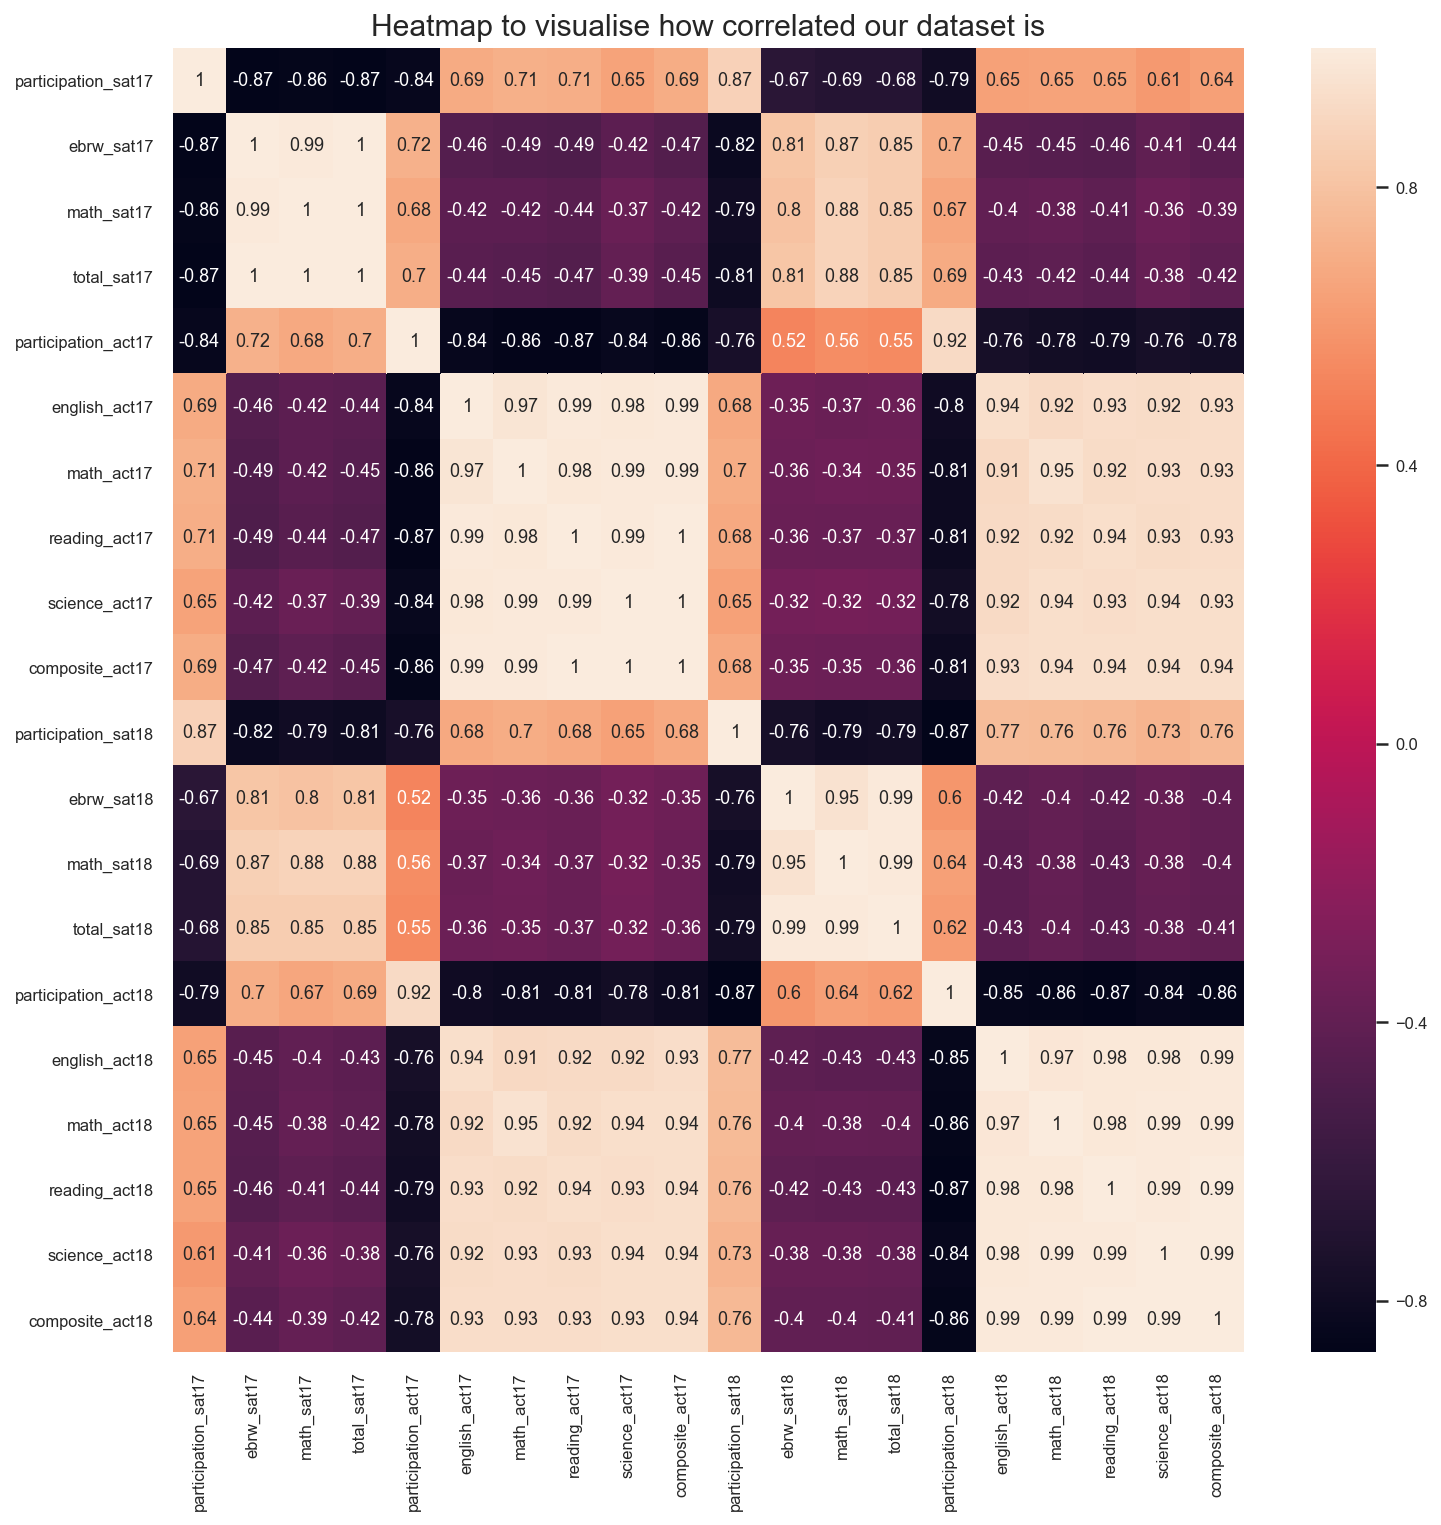

In [74]:
sns.set(font_scale=0.75)
plt.figure(figsize=(12,12))
sns.heatmap(actsat_1718.corr(), annot = True);
plt.title("Heatmap to visualise how correlated our dataset is", fontsize=15);

#### Define a custom function to subplot histograms

In [75]:
# Given
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,nrows*4)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i,column in enumerate(list_of_columns):
        a_val = 1
        c_val = "teal"
        if '17' in str(column):
            a_val = 0.4
        if 'sat' in str(column):
            c_val = "indigo"
        ax[i].hist(dataframe[column], facecolor=c_val, alpha=a_val)
        ax[i].axvline(x=dataframe[column].mean(),linestyle='--',color='red',linewidth=1.5)
        ax[i].axvline(x=dataframe[column].median(),linestyle='--',color='black',linewidth=1.5)
        ax[i].set_title(list_of_titles[i],fontsize=15 )
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=12)
        plt.subplots_adjust(hspace=0.25, top=0.91)
        ax[i].set_ylabel('Number of States',fontsize=12)

#### Plot and interpret histograms 
For each of the following:

- Participation rates for SAT & ACT

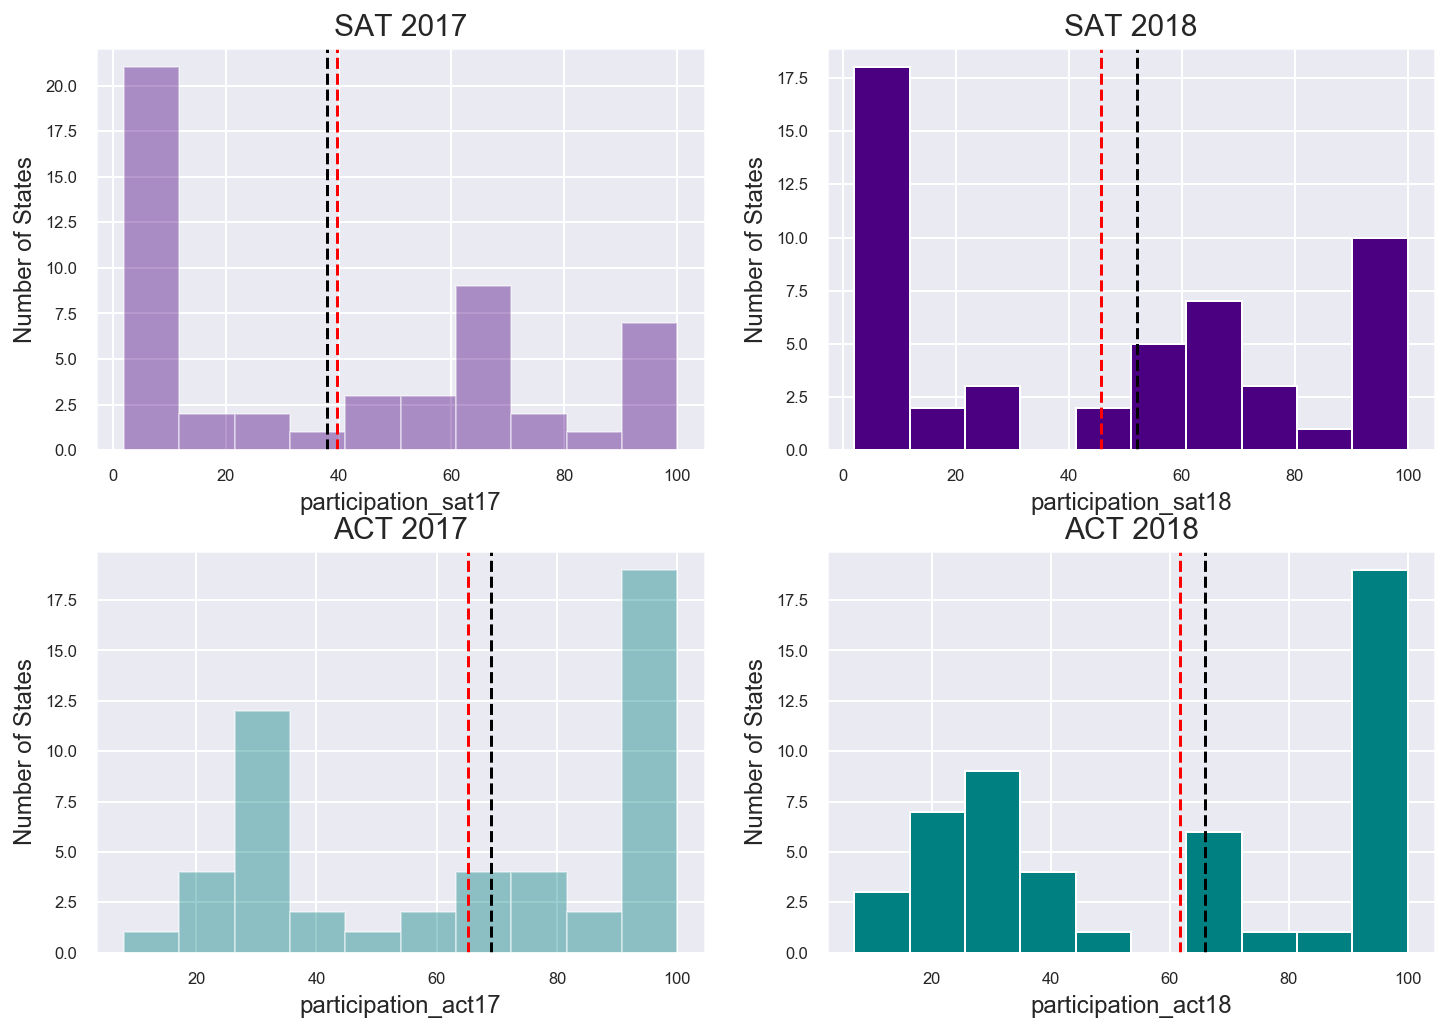

In [76]:
participation_columns = ['participation_sat17','participation_sat18',
                   'participation_act17','participation_act18']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in participation_columns]  

subplot_histograms(actsat_1718, participation_columns, list_of_titles,list_of_xlabels);

- Math scores for SAT & ACT

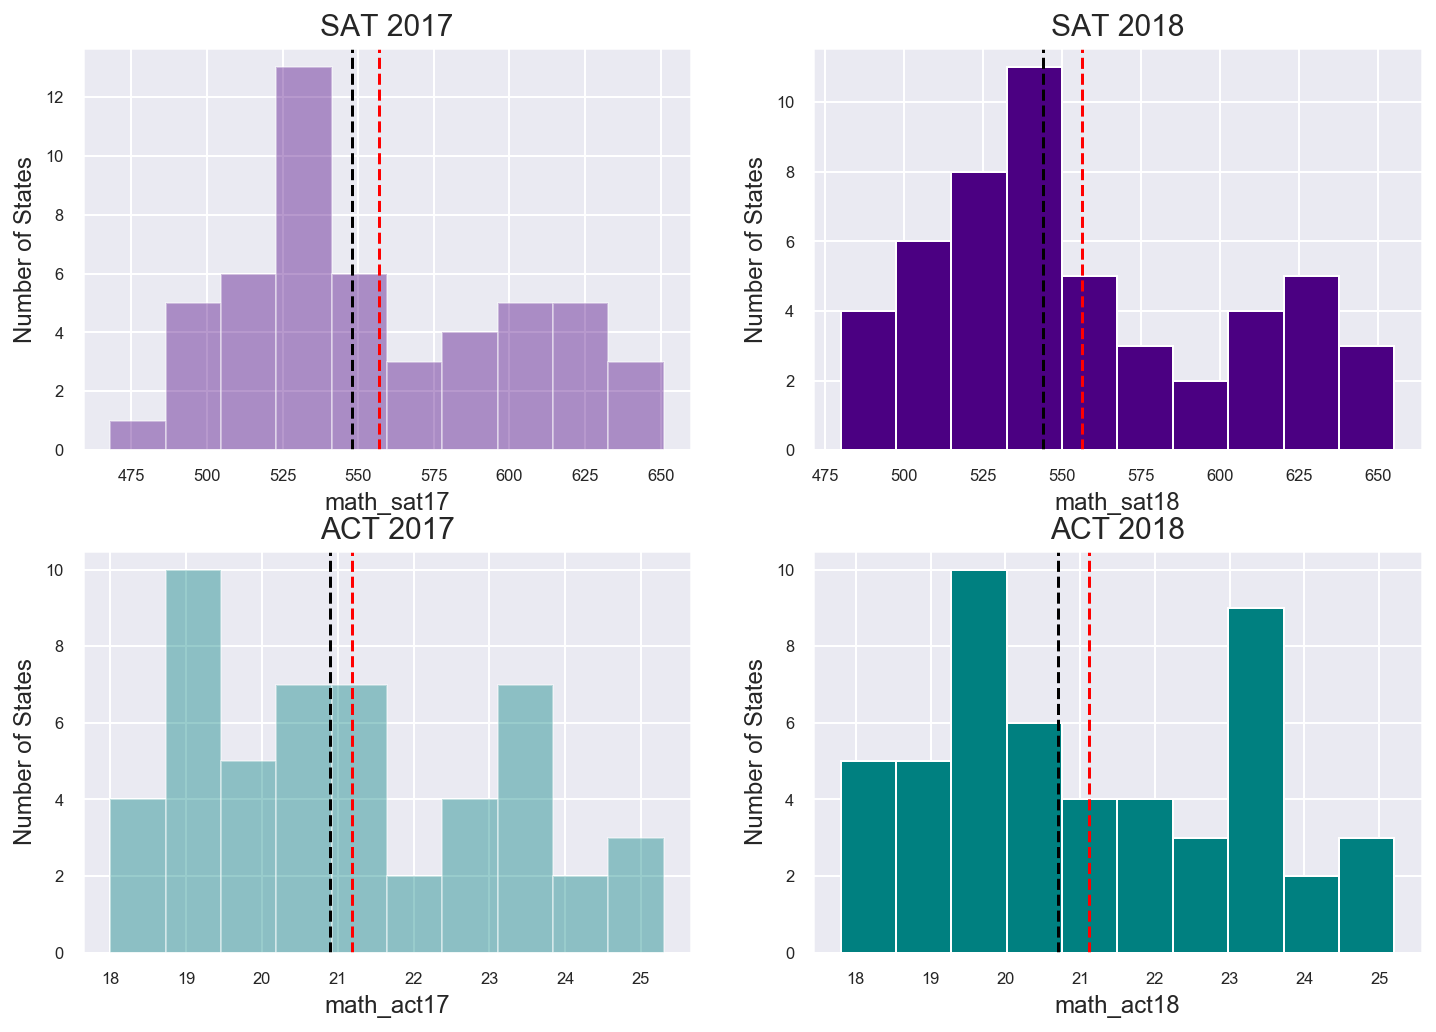

In [77]:
math_columns = ['math_sat17','math_sat18',
                   'math_act17','math_act18']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in math_columns]  

subplot_histograms(actsat_1718, math_columns, list_of_titles,list_of_xlabels)

- Reading/verbal scores for SAT & ACT

In [ ]:
#actsat_1718.head()

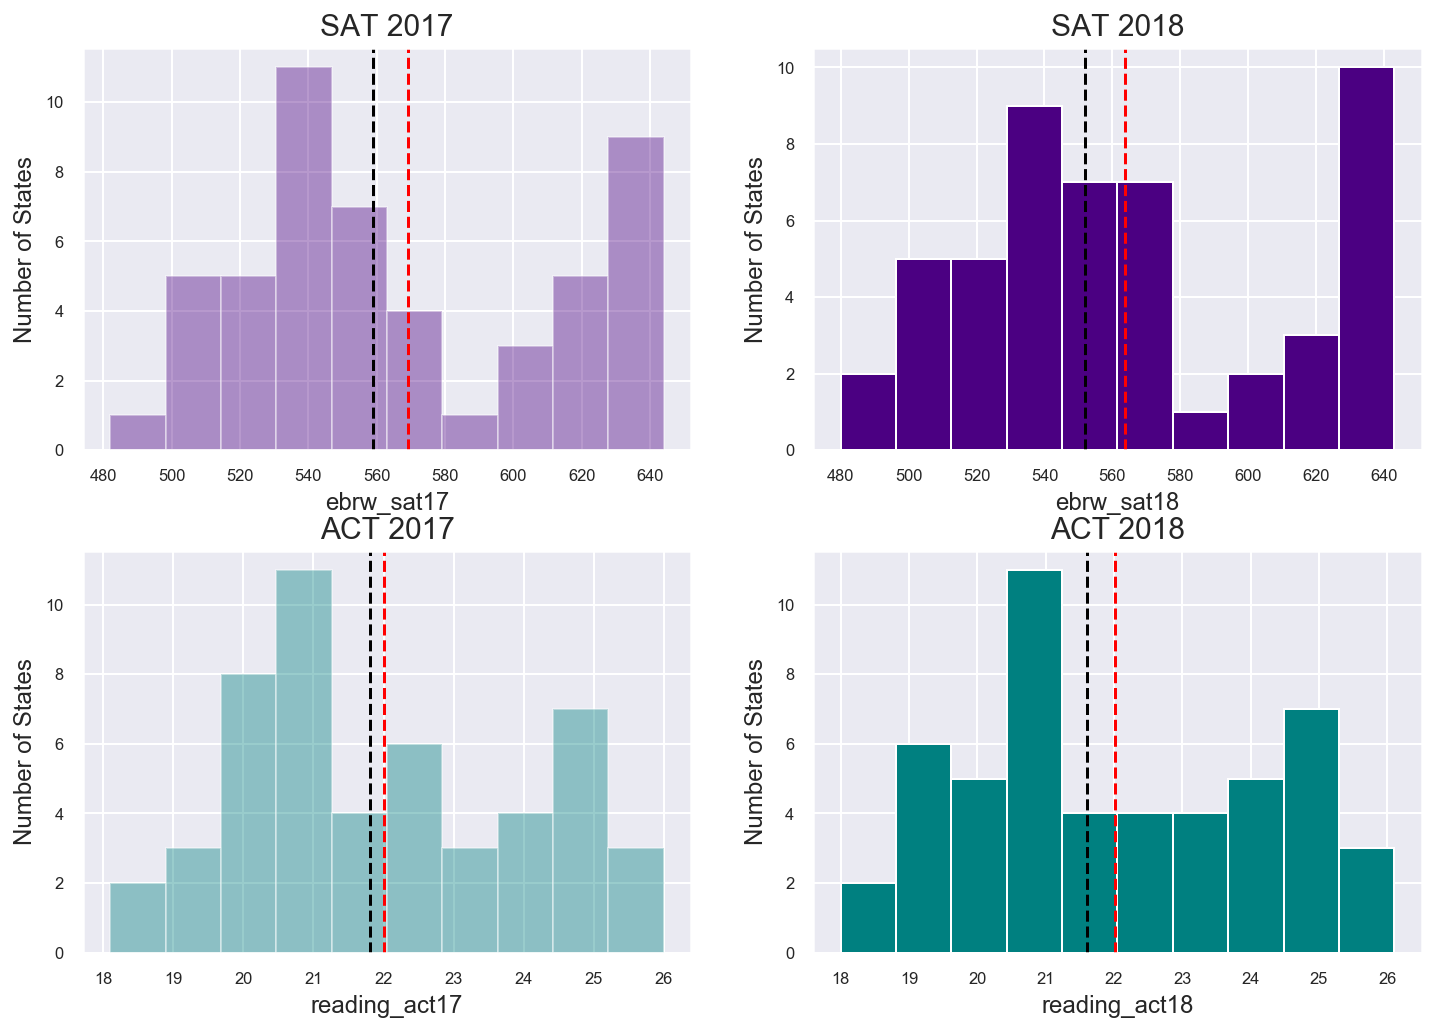

In [78]:
reading_columns = ['ebrw_sat17','ebrw_sat18',
                   'reading_act17','reading_act18']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in reading_columns]  

subplot_histograms(actsat_1718, reading_columns, list_of_titles,list_of_xlabels)

#### Plot and interpret scatter plots

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.

- SAT vs. ACT math scores for 2017

Text(0, 0.5, 'SAT Math 2017')

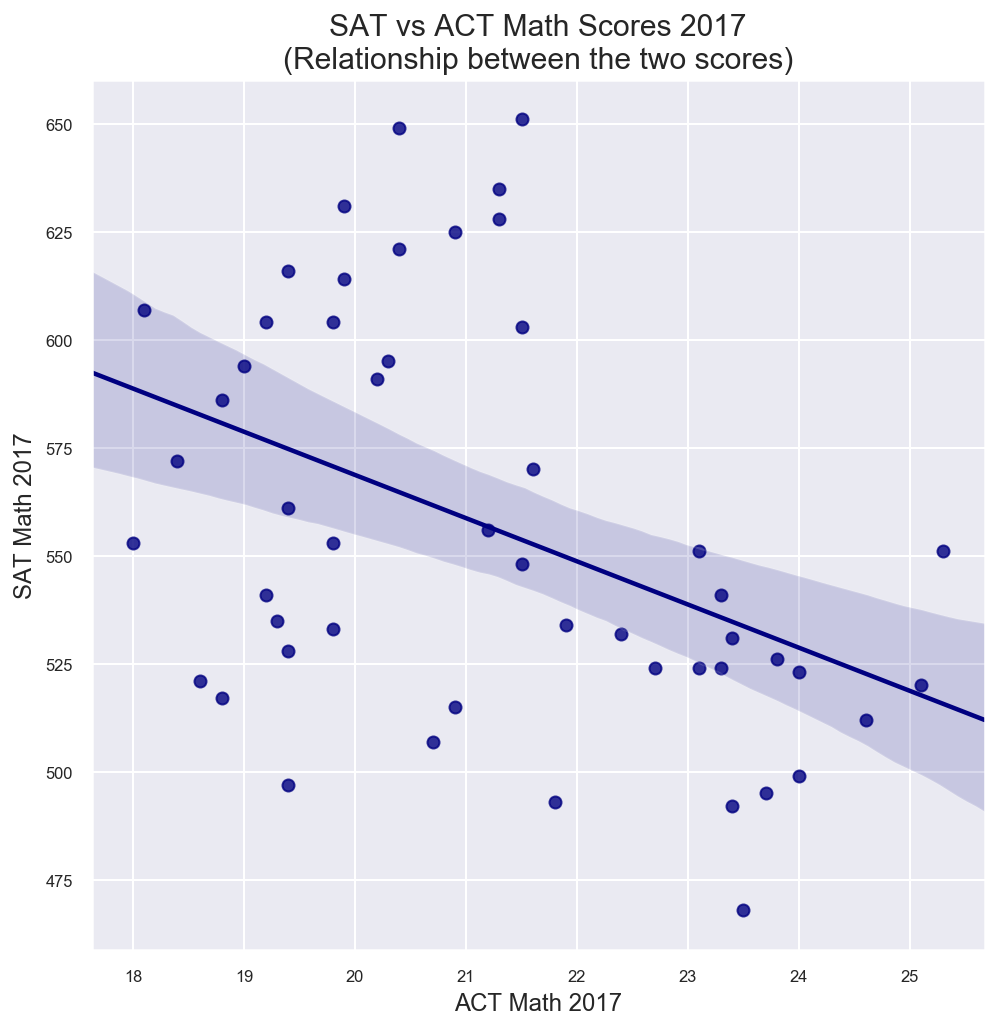

In [79]:
ax = plt.subplots(figsize=(8,8))
ax = sns.regplot(y='math_sat17', x='math_act17', data=actsat_1718[['math_sat17','math_act17']], color = 'navy')
#ax = sns.scatterplot(y='math_sat17', x='math_act17', data=actsat_1718[['math_sat17','math_act17']])
ax.set_title('SAT vs ACT Math Scores 2017\n(Relationship between the two scores)',fontsize=15)
ax.set_xlabel('ACT Math 2017',fontsize=12)
ax.set_ylabel('SAT Math 2017',fontsize=12)

- SAT vs. ACT verbal/reading scores for 2017

Text(0, 0.5, 'SAT Evidence based Reading Writing 2017')

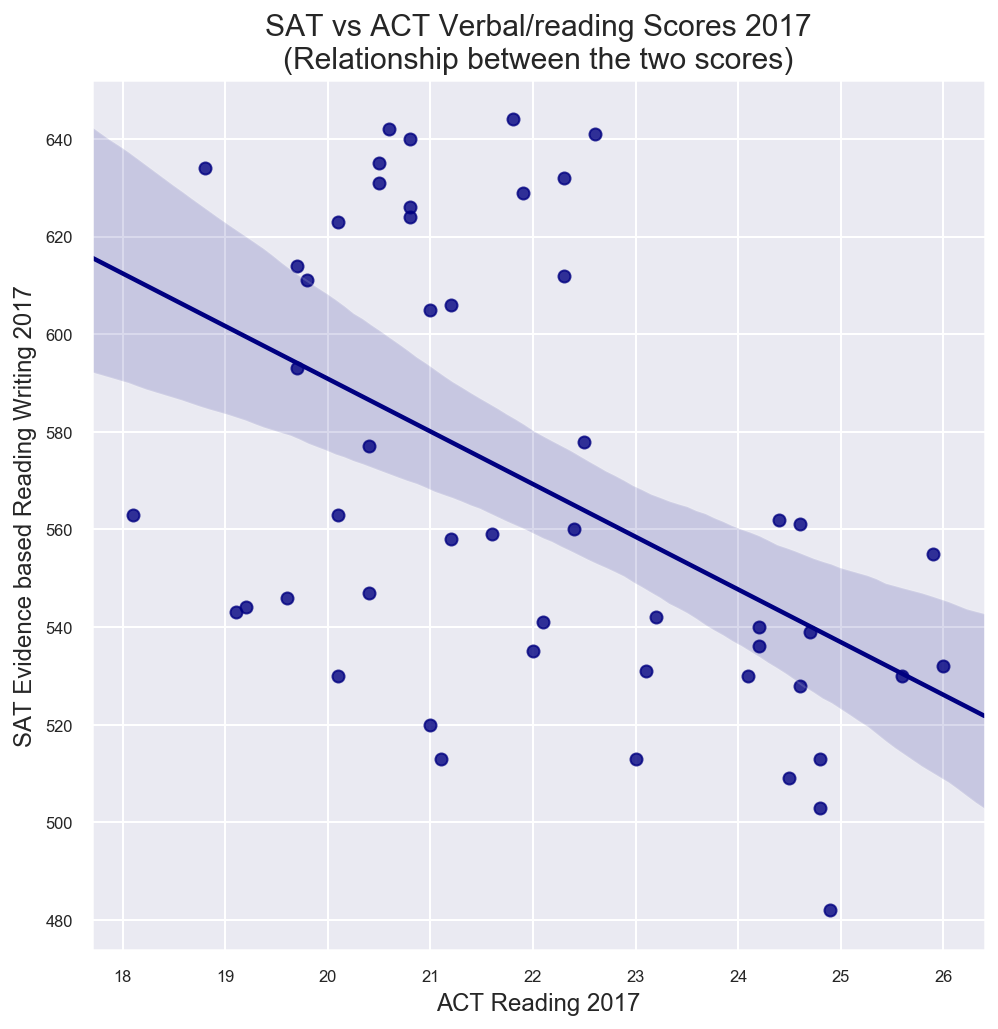

In [80]:
ax = plt.subplots(figsize=(8,8))
ax = sns.regplot(y='ebrw_sat17', x='reading_act17', data=actsat_1718[['ebrw_sat17','reading_act17']], color = 'navy')
#ax = sns.regplot(y='ebrw_sat17', x='reading_act17', data=actsat_1718[['ebrw_sat17','reading_act17']])
ax.set_title('SAT vs ACT Verbal/reading Scores 2017\n(Relationship between the two scores)',fontsize=15)
ax.set_xlabel('ACT Reading 2017',fontsize=12)
ax.set_ylabel('SAT Evidence based Reading Writing 2017',fontsize=12)

- SAT vs. ACT total/composite scores for 2017

Text(0, 0.5, 'SAT Total 2017')

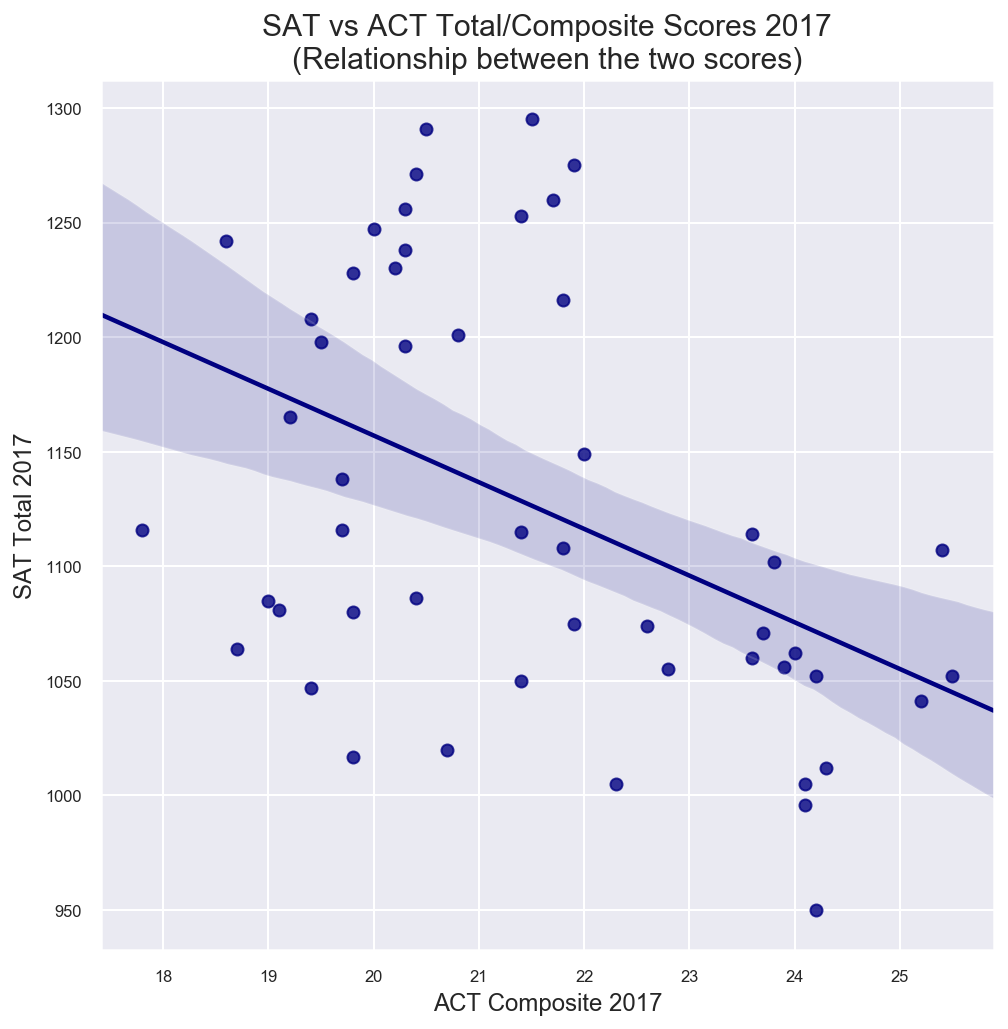

In [81]:
ax = plt.subplots(figsize=(8,8))
ax = sns.regplot(y='total_sat17', x='composite_act17', data=actsat_1718[['total_sat17','composite_act17']], color = 'navy')
#ax = sns.regplot(y='total_sat17', x='composite_act17', data=actsat_1718[['total_sat17','composite_act17']])
ax.set_title('SAT vs ACT Total/Composite Scores 2017\n(Relationship between the two scores)',fontsize=15)
ax.set_xlabel('ACT Composite 2017',fontsize=12)
ax.set_ylabel('SAT Total 2017',fontsize=12)

- Total scores for SAT 2017 vs. 2018

Text(0, 0.5, 'SAT Total 2017')

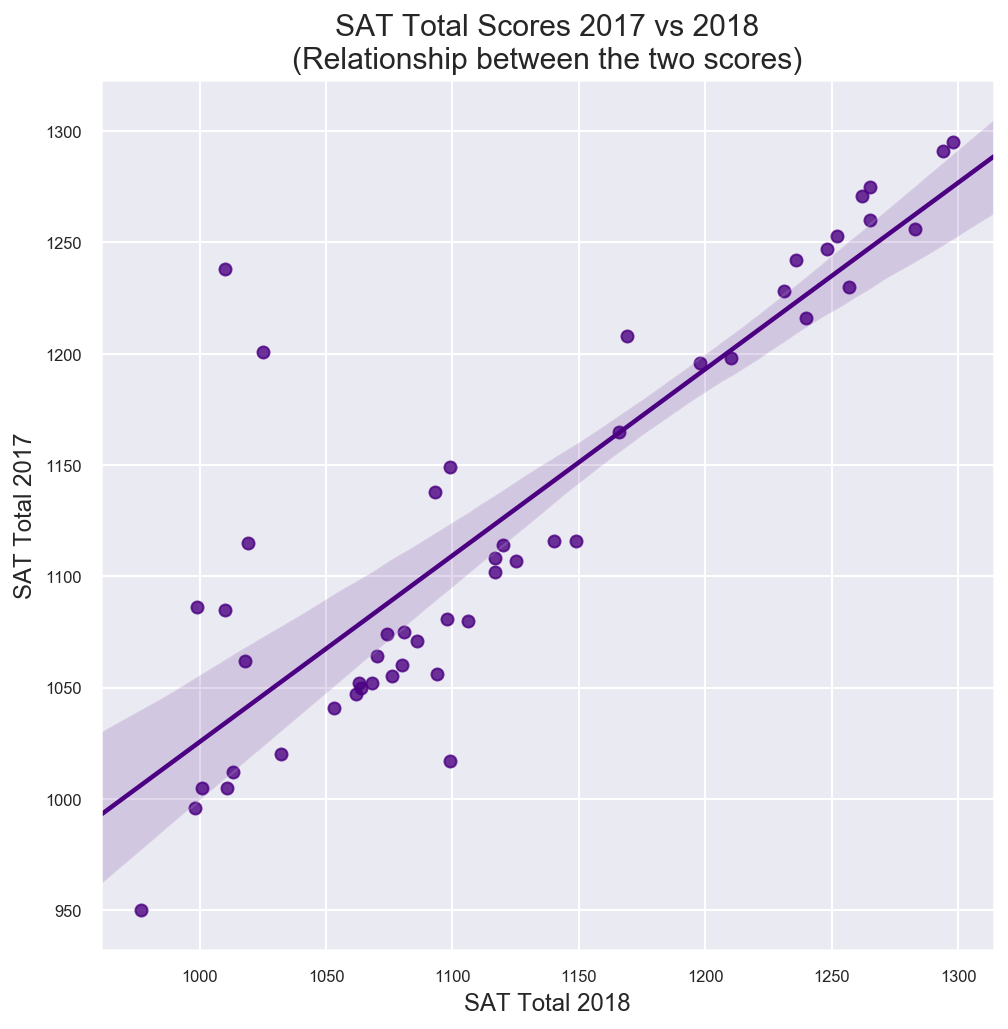

In [82]:
ax = plt.subplots(figsize=(8,8))
ax = sns.regplot(y='total_sat17', x='total_sat18', data=actsat_1718[['total_sat17','total_sat18']], color = 'indigo')
#ax = sns.regplot(y='total_sat17', x='composite_act17', data=actsat_1718[['total_sat17','composite_act17']])
ax.set_title('SAT Total Scores 2017 vs 2018\n(Relationship between the two scores)',fontsize=15)
ax.set_xlabel('SAT Total 2018',fontsize=12)
ax.set_ylabel('SAT Total 2017',fontsize=12)

- Composite scores for ACT 2017 vs. 2018

Text(0, 0.5, 'ACT Conposite 2017')

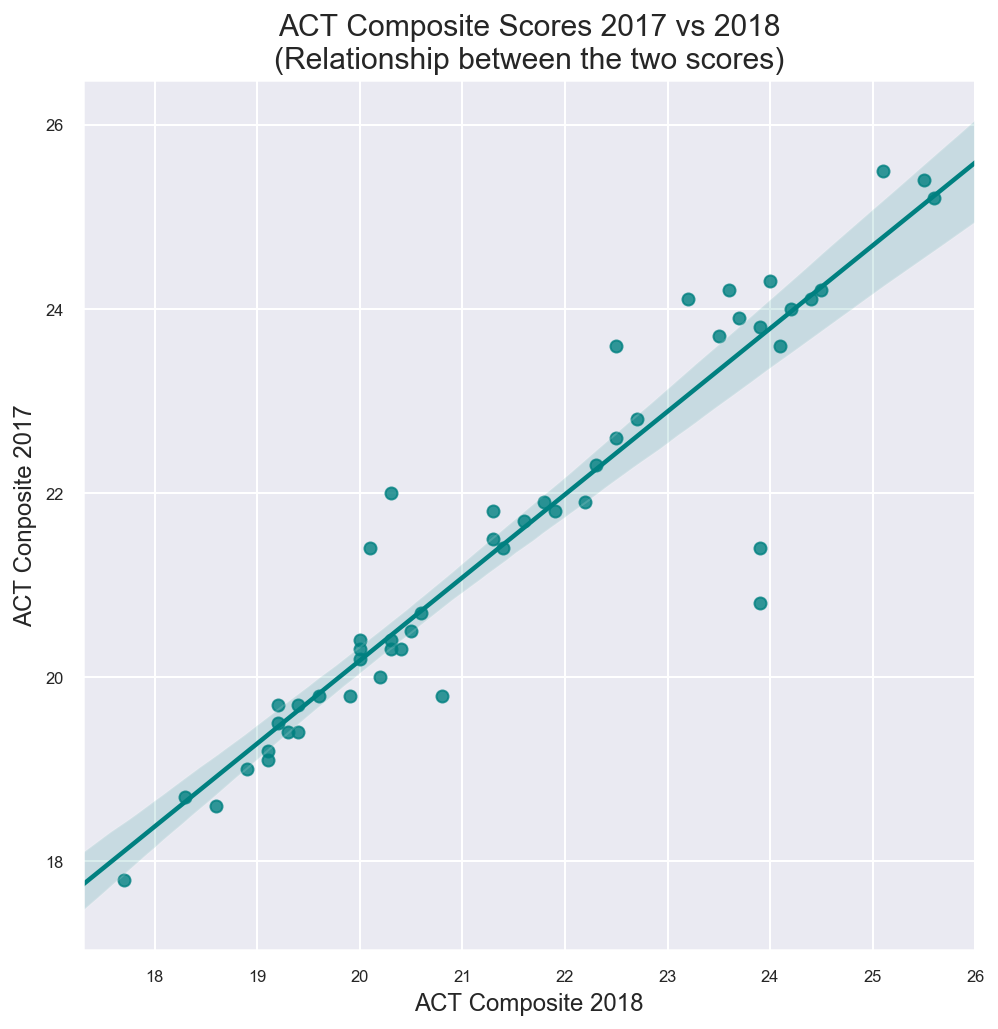

In [83]:
ax = plt.subplots(figsize=(8,8))
ax = sns.regplot(y='composite_act17', x='composite_act18', data=actsat_1718[['composite_act17','composite_act18']], color = 'teal')
#ax = sns.regplot(y='total_sat17', x='composite_act17', data=actsat_1718[['total_sat17','composite_act17']])
ax.set_title('ACT Composite Scores 2017 vs 2018\n(Relationship between the two scores)',fontsize=15)
ax.set_xlabel('ACT Composite 2018',fontsize=12)
ax.set_ylabel('ACT Conposite 2017',fontsize=12)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

- SAT Scores

Text(0, 0.5, 'Score')

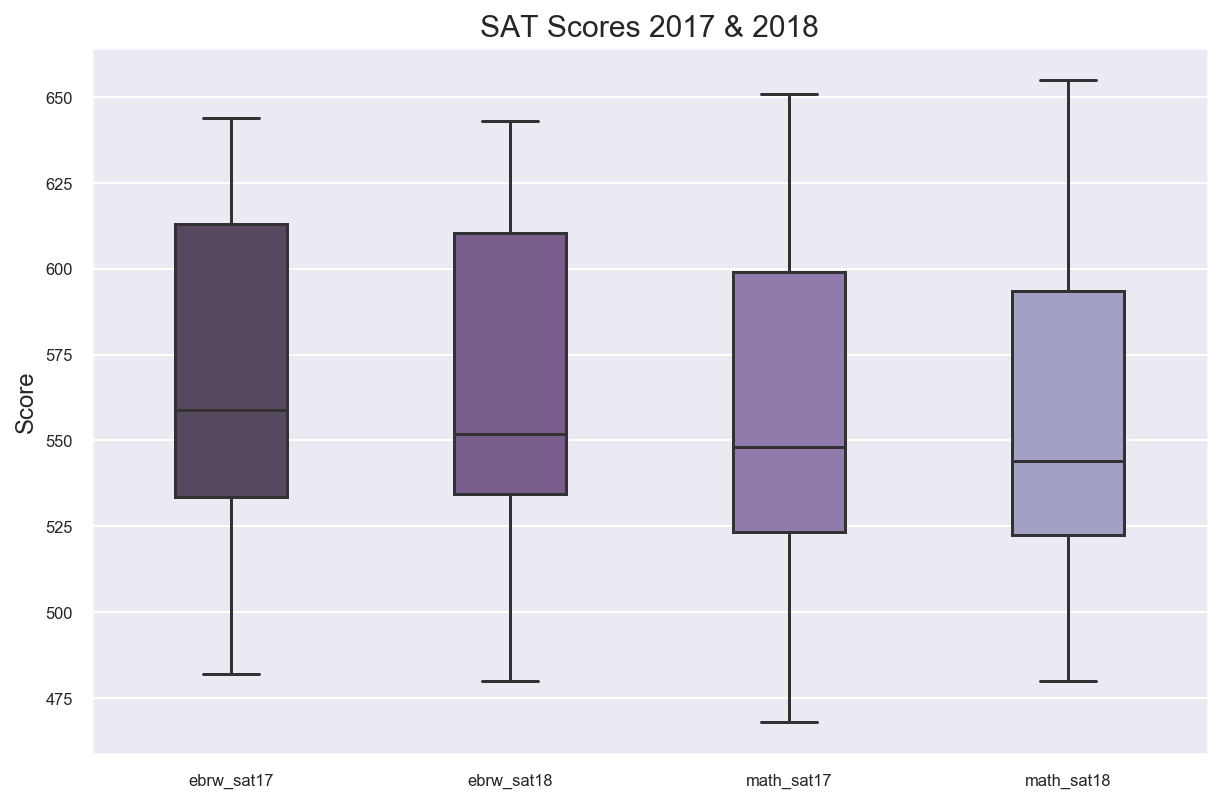

In [84]:
ax = plt.subplots(figsize=(10,6.5))
#ax = sns.boxplot(actsat_1718[['ebrw_sat17','ebrw_sat18','math_sat17','math_sat18']])
sns.boxplot(data=actsat_1718[['ebrw_sat17','ebrw_sat18','math_sat17','math_sat18']],width=0.4, palette = 'BuPu_d')
plt.title('SAT Scores 2017 & 2018',fontsize=15)
plt.ylabel('Score',fontsize=12)

- ACT Scores (2017)

In [85]:
actsat_1718.columns

Index(['state', 'participation_sat17', 'ebrw_sat17', 'math_sat17',
       'total_sat17', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17',
       'participation_sat18', 'ebrw_sat18', 'math_sat18', 'total_sat18',
       'participation_act18', 'english_act18', 'math_act18', 'reading_act18',
       'science_act18', 'composite_act18'],
      dtype='object')

Text(0, 0.5, 'Score')

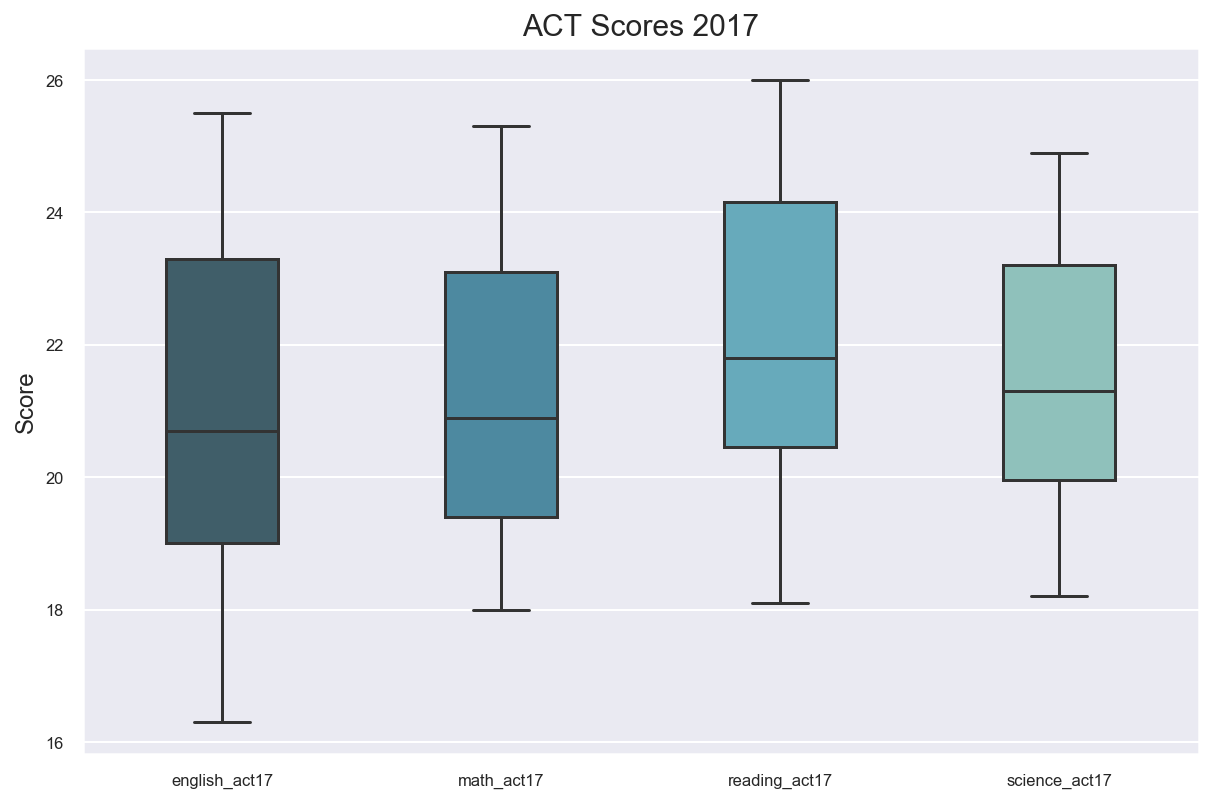

In [86]:
ax = plt.subplots(figsize=(10,6.5))
#ax = sns.boxplot(actsat_1718[['ebrw_sat17','ebrw_sat18','math_sat17','math_sat18']])
sns.boxplot(data=actsat_1718[['english_act17', 'math_act17',
       'reading_act17', 'science_act17']],width=0.4, palette = 'GnBu_d')
plt.title('ACT Scores 2017',fontsize=15)
plt.ylabel('Score',fontsize=12)

- ACT Scores (2018)

Text(0, 0.5, 'Score')

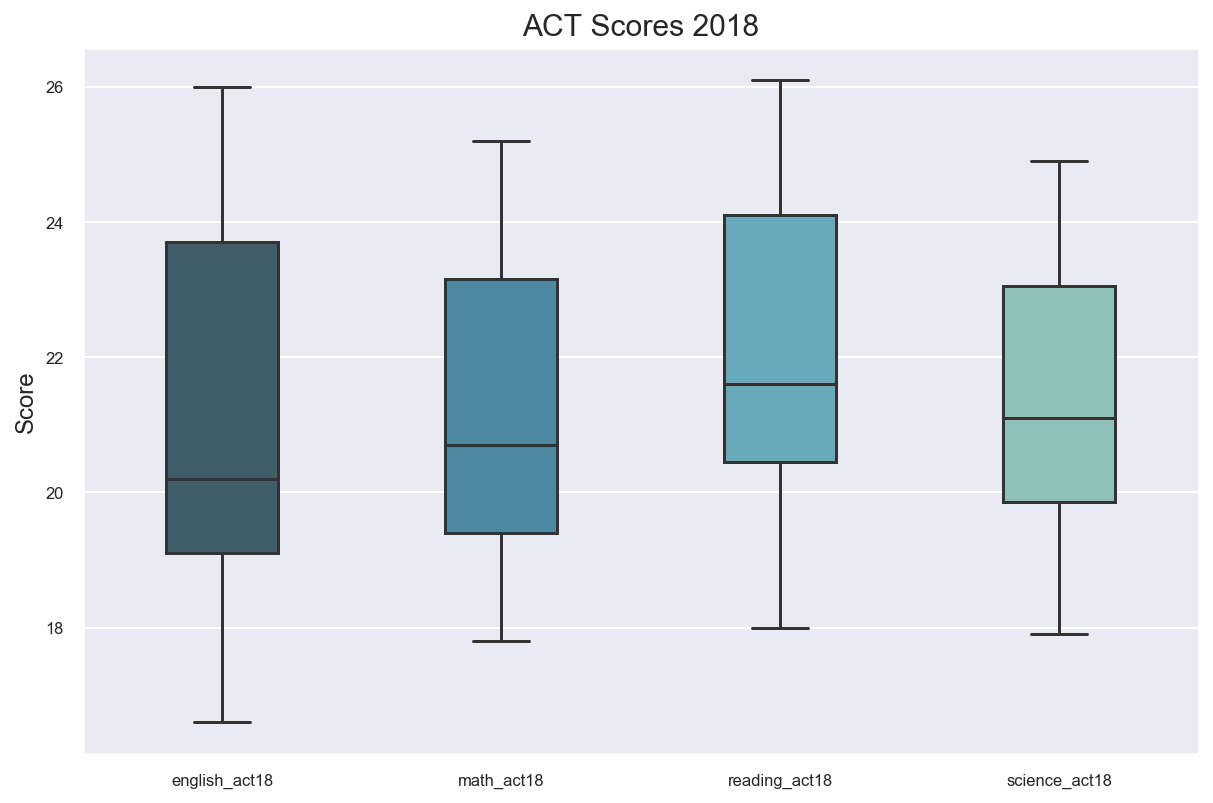

In [87]:
ax = plt.subplots(figsize=(10,6.5))
#ax = sns.boxplot(actsat_1718[['ebrw_sat17','ebrw_sat18','math_sat17','math_sat18']])
sns.boxplot(data=actsat_1718[['english_act18', 'math_act18',
       'reading_act18', 'science_act18']],width=0.4, palette = 'GnBu_d')
plt.title('ACT Scores 2018',fontsize=15)
plt.ylabel('Score',fontsize=12)

- ACT Scores (2017 and 2018)

Text(0, 0.5, 'Score')

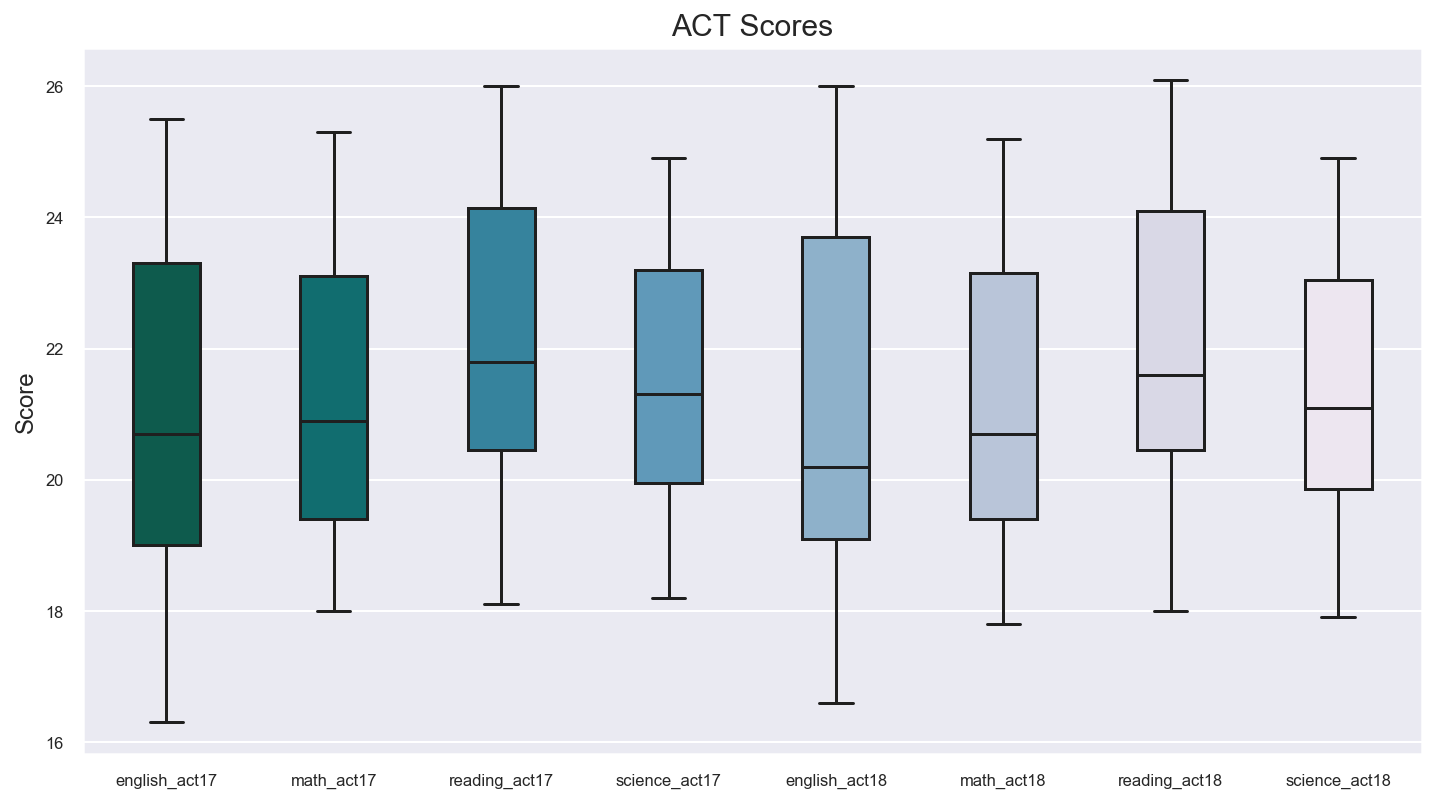

In [88]:
ax = plt.subplots(figsize=(12,6.5))
#ax = sns.boxplot(actsat_1718[['ebrw_sat17','ebrw_sat18','math_sat17','math_sat18']])
sns.boxplot(data=actsat_1718[['english_act17', 'math_act17',
       'reading_act17', 'science_act17','english_act18', 'math_act18',
       'reading_act18', 'science_act18']],width=0.4, palette = 'PuBuGn_r')
plt.title('ACT Scores',fontsize=15)
plt.ylabel('Score',fontsize=12)

- Participation rates for SAT and ACT (2017, 2018)

(0, 120)

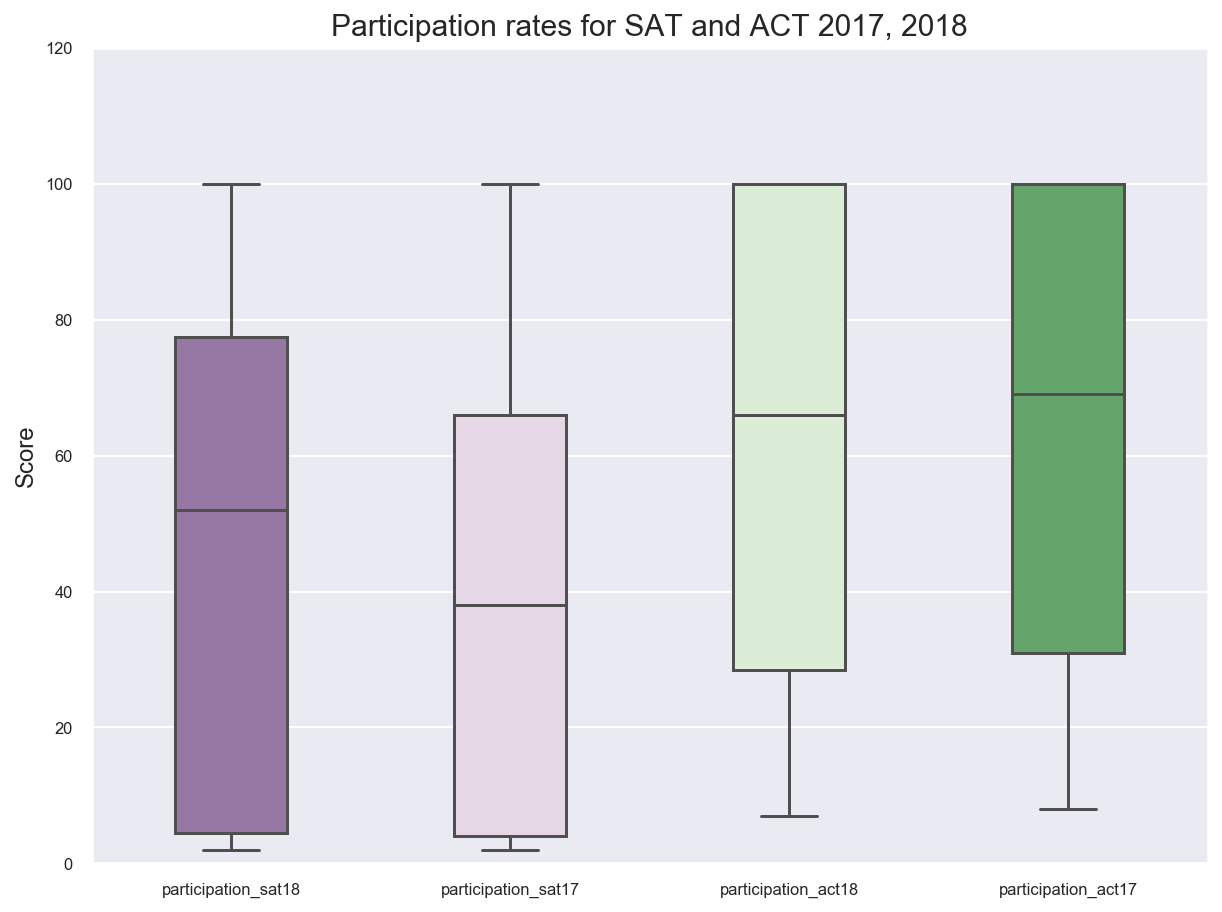

In [89]:
ax = plt.subplots(figsize=(10,7.5))
#ax = sns.boxplot(actsat_1718[['ebrw_sat17','ebrw_sat18','math_sat17','math_sat18']])
sns.boxplot(data=actsat_1718[['participation_sat18', 'participation_sat17',
       'participation_act18', 'participation_act17']],width=0.4, palette = "PRGn")
plt.title('Participation rates for SAT and ACT 2017, 2018',fontsize=15)
plt.ylabel('Score',fontsize=12)
plt.ylim(0,120)

- Total/Composite scores for SAT and ACT (2017, 2018)

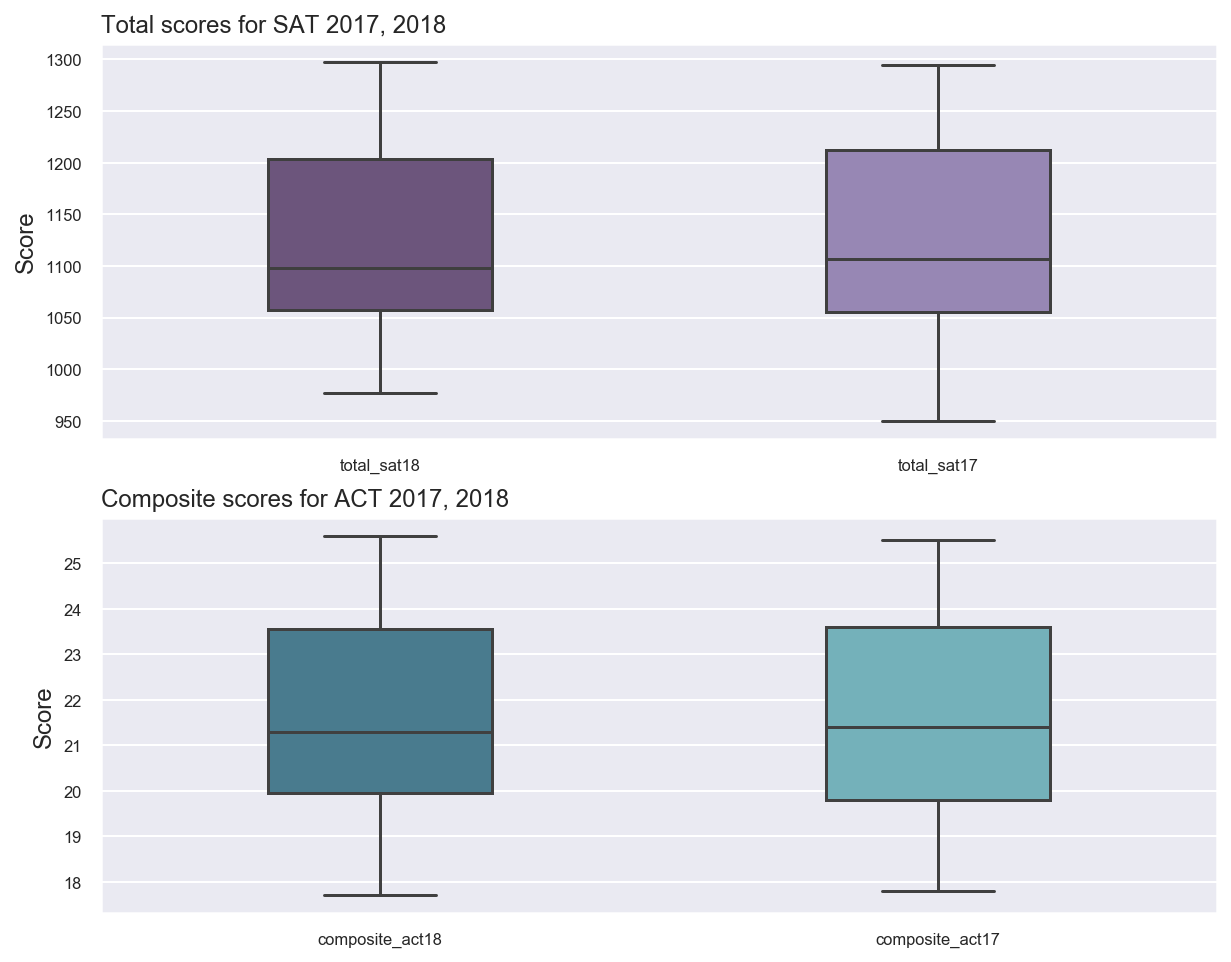

In [90]:
ax = plt.subplots(figsize=(10,8))
ax1 = plt.subplot(211)
ax1.set_title("Total scores for SAT 2017, 2018", loc = "left", fontsize = 12)
ax1 = sns.boxplot(data=actsat_1718[['total_sat18', 'total_sat17']],width=0.4, palette = 'BuPu_d')
ax1 = plt.ylabel('Score',fontsize=12)

ax2 = plt.subplot(212)
ax2.set_title("Composite scores for ACT 2017, 2018", loc = "left", fontsize = 12)
ax2 = sns.boxplot(data=actsat_1718[['composite_act18', 'composite_act17']],width=0.4, palette= 'GnBu_d')
#plt.title('Total/Composite scores for SAT and ACT 2017, 2018',fontsize=15)
ax2 = plt.ylabel('Score',fontsize=12)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [91]:
actsat_1718.columns

Index(['state', 'participation_sat17', 'ebrw_sat17', 'math_sat17',
       'total_sat17', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17',
       'participation_sat18', 'ebrw_sat18', 'math_sat18', 'total_sat18',
       'participation_act18', 'english_act18', 'math_act18', 'reading_act18',
       'science_act18', 'composite_act18'],
      dtype='object')

In [ ]:
# g = sns.pairplot(actsat_1718[['participation_sat17', 'ebrw_sat17', 'math_sat17',
#        'total_sat17', 'participation_sat18', 'ebrw_sat18', 'math_sat18', 'total_sat18']])
# g.fig.suptitle("Summary for SAT", y = 1.02, fontsize = 20)

In [ ]:
# g = sns.pairplot(actsat_1718[['participation_act17', 'english_act17', 'math_act17',
#        'reading_act17', 'science_act17', 'composite_act17']])
# g.fig.suptitle("Summary for ACT 2017", y = 1.02, fontsize = 20)

In [92]:
actsat_1718.describe()

,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat18,ebrw_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


- The sample variance, s2, is a popular measure of dispersion. It is an average of the squared deviations from the mean.
- The standard error of the mean, a measure of the variation of the sample mean about the population mean, is computed by dividing the sample standard deviation by the square root of the sample size.
- 95% Confidence Interval for the Mean (95% LCL & 95% UCL)
    - This is the upper and lower values of a 95% confidence interval estimate for the mean based on a t distribution with n – 1 degrees of freedom. This interval estimate assumes that the population standard deviation is not known and that the data for this variable are normally distributed.
- Range: The difference between the largest and smallest data values.
- Skewness: Measures the direction and degree of asymmetry in the data distribution.
    - A right tailed distribution or a  positively skewed distribution has its mean greater than the median as the outliers present in the skewed right tail of the distribution influence the mean.
    - A left tailed distribution has its mean smaller than the median

In [104]:
# The center, the shape, and the spread.
mu = pd.Series(actsat_1718.mean(), name="mean")
std = pd.Series(actsat_1718.std(), name="std_dev")
sk = pd.Series(actsat_1718.skew(), name="skewness")
mdn = pd.Series(actsat_1718.median(), name="median")
m_s = pd.concat([mu,mdn,std,sk], axis=1)

# ms_skew_std = ms_skew.sort_values("std_dev", ascending = False)
# ms_skew_std

In [108]:
ms_skew = m_s.sort_values('std_dev',ascending = False)
ms_skew

,mean,median,std_dev,skewness
total_sat18,1120.019608,1098.0,94.155083,0.466432
total_sat17,1126.098039,1107.0,92.494812,0.310903
math_sat18,556.235294,544.0,47.772623,0.530407
ebrw_sat18,563.686275,552.0,47.502627,0.282300
math_sat17,556.882353,548.0,47.121395,0.365040
ebrw_sat17,569.117647,559.0,45.666901,0.272693
participation_sat18,45.745098,52.0,37.314256,0.136228
participation_sat17,39.803922,38.0,35.276632,0.346450
participation_act18,61.647059,66.0,34.080976,-0.021916
participation_act17,65.254902,69.0,32.140842,-0.197989


In [95]:
title_labels = actsat_1718.columns.tolist()[1:]
title_labels
col_list = [i for i in actsat_1718.columns[1:]]
col_list
row_labels = ['' for _ in range(len(col_list))]      # fill blank range for x-labels - [i for i in participation_columns]
row_labels

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

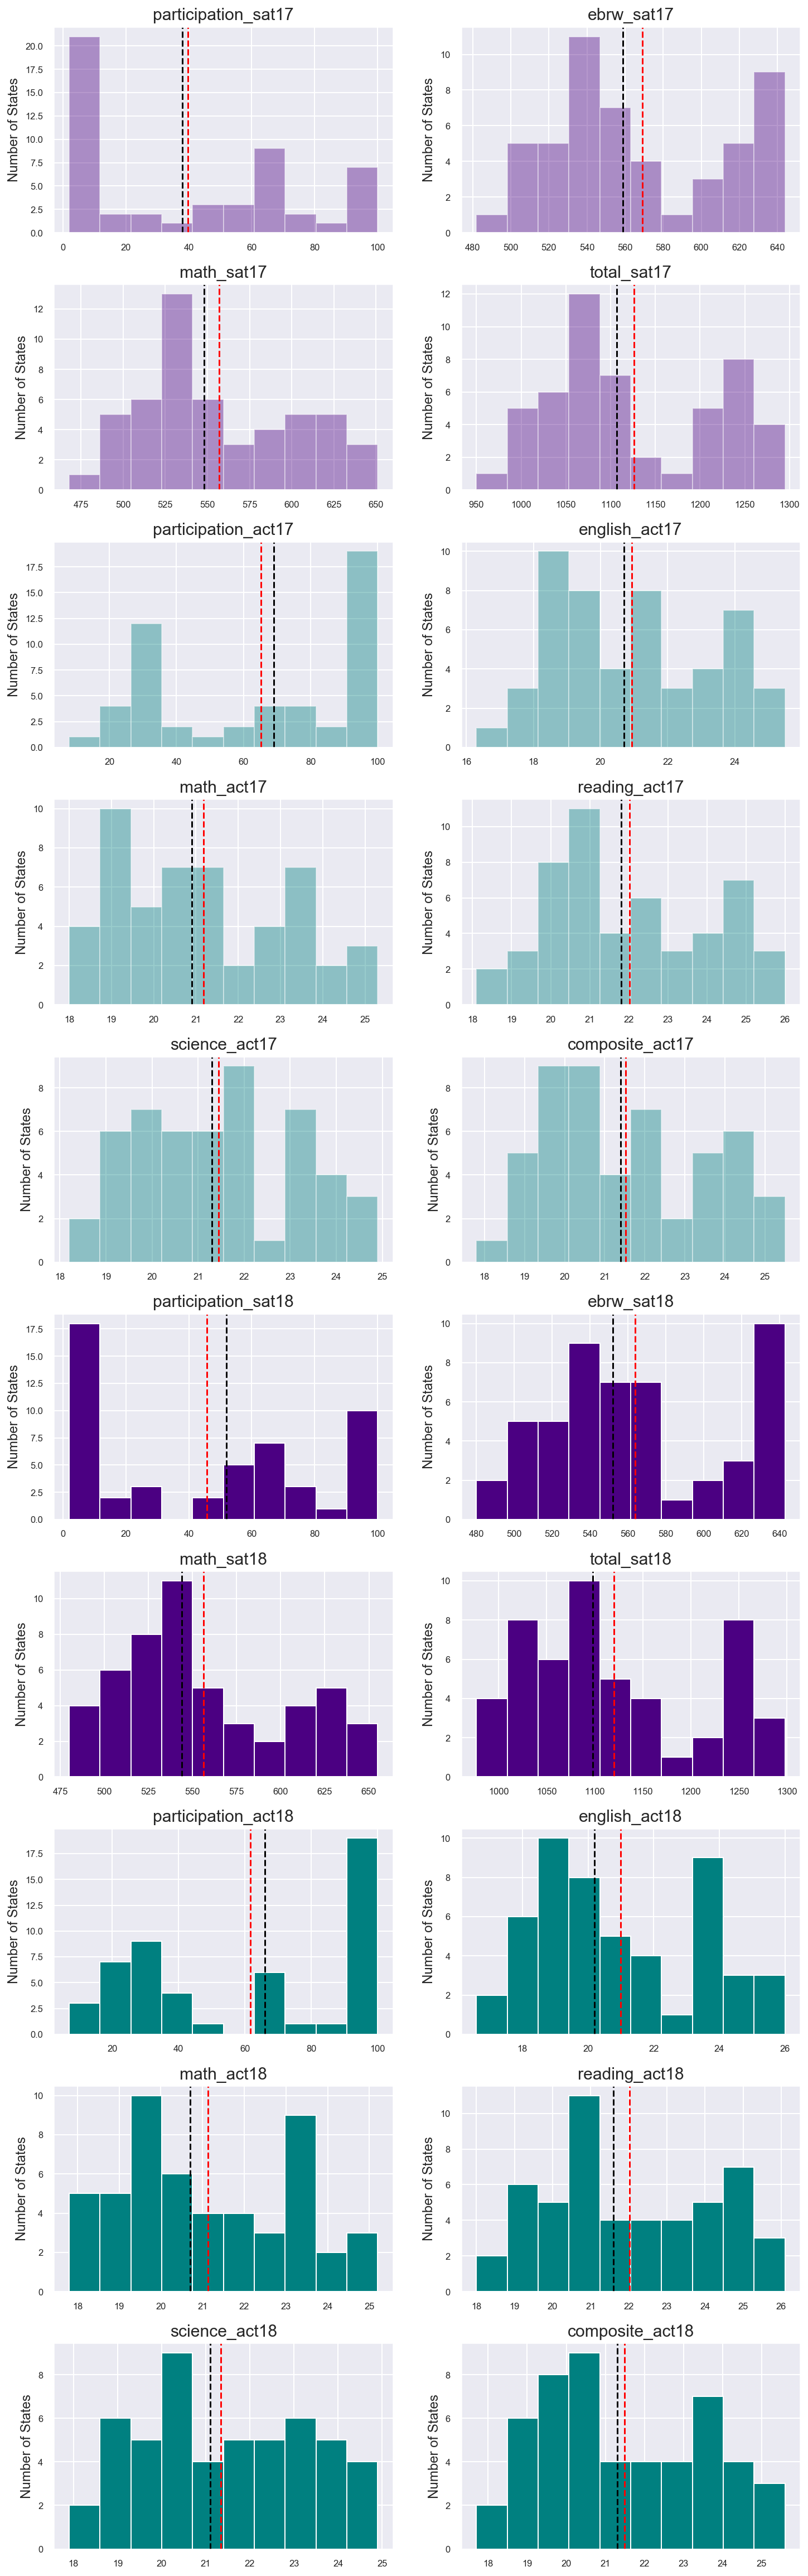

In [96]:
subplot_histograms(actsat_1718, col_list, title_labels, row_labels)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?
Does This Assumption Hold for:
- Math
- Reading
- Rates

#### Estimate Limits of Data
Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

#### Statistical Evaluation of Distributions 
Run Hypothesis Testing

For each year: 

$$ H_0: \mu_{\text{SAT Participation}} - \mu_{\text{ACT Participation}} = 0 $$

$$ H_A: \mu_{\text{SAT Participation}} - \mu_{\text{ACT Participation}} \ne 0 $$

In [ ]:
# Ho : μ_SAT = μ_ACT - 
# HA : μ_SAT ≠ μ_ACT - 
#for an alpha value of 0.05

In [97]:
# For 2017
stats.ttest_ind(actsat_1718['participation_sat17'], actsat_1718['participation_act17'])

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

In [98]:
# For 2018
stats.ttest_ind(actsat_1718['participation_sat18'], actsat_1718['participation_act18'])

Ttest_indResult(statistic=-2.2471737667351626, pvalue=0.026826308222090527)

In [99]:
# 95% confidence interval for SAT 2017 participation
stats.t.interval(0.95, len(actsat_1718['participation_sat17'])-1, loc=np.mean(actsat_1718['participation_sat17']),
                 scale=np.std(actsat_1718['participation_sat17'], ddof = 1))

(-31.051279537380644, 110.65912267463554)

**Hypothesis**:  SAT scores are better than ACT scores 

$$ H_0: \mu_{\text{SAT scores}} \leq \mu_{\text{ACT scores}} $$
$$ H_A: \mu_{\text{SAT scores}} > \mu_{\text{ACT scores}} $$

For this *one-sample t-test*, the t-statistic is

### $$t = \frac{\bar{x} - IS}{s/\sqrt{n}}$$

Our aim is to reject the null hypothesis

To compare scores between SAT and ACT, scores have to be normalised to a common range

In [100]:
t_meanscores['mean_sat17n'] = t_meanscores['mean_sat17']/800
t_meanscores['mean_sat18n'] = t_meanscores['mean_sat18']/800
t_meanscores['composite_act17n'] = t_meanscores['composite_act17']/36
t_meanscores['composite_act18n'] = t_meanscores['composite_act18']/36
analyse_scores = t_meanscores[['state', 'mean_sat17n','mean_sat18n', 'composite_act17n', 'composite_act18n']]
analyse_scores.head()

,state,mean_sat17n,mean_sat18n,composite_act17n,composite_act18n
0,Alabama,0.728125,0.728750,0.533333,0.530556
1,Alaska,0.675000,0.691250,0.550000,0.577778
2,Arizona,0.697500,0.718125,0.547222,0.533333
3,Arkansas,0.755000,0.730625,0.538889,0.538889
4,California,0.659375,0.672500,0.633333,0.630556


In [101]:
mu = pd.Series(analyse_scores.mean(), name="mean")
std = pd.Series(analyse_scores.std(), name="std_dev")
analysis_ms = pd.concat([mu,std], axis=1)
analysis_ms

,mean,std_dev
mean_sat17n,0.703811,0.057809
mean_sat18n,0.700012,0.058847
composite_act17n,0.597767,0.056130
composite_act18n,0.596841,0.058508


In [136]:
actsat_1718[actsat_1718['state'] == 'Arizona']

,state,participation_sat17,ebrw_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,...,participation_sat18,ebrw_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66,18.2,19.4,19.5,19.2,19.2


### We are not able compare the scores as sample size is different for every sample

In [ ]:
actsat_1718.info()

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?